# Re-analysis of PXD014414: Metaplastic breast cancer

## Sabra I. Djomehri, et al.

## [Nature Communications (2020) 11:1723](https://doi.org/10.1038/s41467-020-15283-z)


### Data re-analysis performed by Phil Wilmarth, PSR Core OHSU

#### April 26, 2020

---

- [Overview](#overview) 
- [Library and data loading](#load_data) 
- [Clustering and normalization](#TMM)
- [1. Chondroid versus Spindle](#C_Sp) 
- [2. Chondroid versus Squamous](#C_Sq) 
- [3. Spindle versus Squamous](#Sp_Sq) 
- [Summary](#summary)

---

## <a name="overview"></a>Overview

The data were first presented in this publication:

> Djomehri, S.I., Gonzalez, M.E., da Veiga Leprevost, F., Tekula, S.R., Chang, H.Y., White, M.J., Cimino-Mathews, A., Burman, B., Basrur, V., Argani, P. and Nesvizhskii, A.I., 2020. Quantitative proteomic landscape of metaplastic breast carcinoma pathological subtypes and their relationship to triple-negative tumors. Nature communications, 11(1), pp.1-15.

A total of 27 breast tissue samples were studied with TMT (Ref. 1) labeling using the newer SPS MS3 method (Ref. 2). The instrument was a Thermo Fusion Tribrid mass spectrometer (Ref. 3). The paper was looking at the proteomic signature of metaplastic breast cancer and how different metaplastic subtypes might differ. Normal tissue and less aggressive triple negative breast cancer samples were also profiled. One of the metaplastic samples was only normal tissue. The final number of samples were 7 normal tissue, 6 triple negative non-metaplastic, and 14 metaplastic samples (in a few categories). The data in the above publication was processed with an MSFragger/Philosopher data analysis pipeline (github.com/Nesvilab/philosopher) using a reporter ion ratio oriented methodology. The use of ratios and log transformations make the analysis less transparent and not easy to visually check.

In this notebook, I will show that high quality analyses can be done without using ratios. The 27 samples in the experiment were split across 3 10-plex experiments (8-fraction separations for each). The 131 channel contained a pooled reference channel. The pooled channel was used for Internal Reference Scaling (IRS) (Ref. 4) so that all of the data could be kept in its original intensity scale. The [Comet/PAW pipeline](https://github.com/pwilmart/PAW_pipeline) (Ref. 5) was used for highly sensitive PSM identification and robust TMT reporter ion processing. 

The PAW pipeline uses accurate mass measurements from modern instruments in a flexible way maximize PSM identifications. Extended parsimony principles maximize the quantiative information content compared to cumbersome razor peptide approaches. The two-peptide rule is employed for accurate protein identification without any reliance on *ad hoc* protein ranking functions. Very low intensity reporter ion scans are filtered out and any remaining missing reporter ion data is handled in a simple way.

There were 754,130 MS scans from the 24 RAW files. There were 266,723 PSMs at 1% FDR from the PAW processing. The publication reported 251,305 at a similar FDR. The PAW protein inference had 5,127 non-contaminant, non-decoy proteins (proteins, protein groups, or protein families) with at least two distinct peptides per protein per plex. There were 5,087 proteins that had some reporter ion signals in at least one plex. 

After the IRS step, there were 4,132 quantifiable proteins seen in each plex. This was 81% of the total number of protein identifications. Loss of 955 proteins might seem concerning at first glance. However, the 4,132 proteins account for 99.55% of the total reporter ion intensity in the 3-plex experiment. The 955 rejected proteins were only 0.45% of the total signal. If we compute the average IRS adjusted reporter ion intensity for each of the 4,132 proteins and sort them by decreasing average intensity, the last protein has an average intensity of 1,032. The smallest non-zero reporter ion signals in individual scans was around 500 (Orbitrap intensities have some small minimum value (we see 350-ish on our Fusion, this data had about 500) or the data is missing). We require two peptides and 2 times 500 is 1,000 and that is right where the cutoff is.

Another important point with TMT data and missing data for multi-plex experiments is that data end up missing by plex rather than randomly by individual data point. This is likely something no missing data imputation algorithm was designed to consider. The 4,132 proteins only have 242 missing intensities out of 111,564 data points (4132 times 27) or 0.2% missing values. The 955 proteins have 25,785 data points with 11,454 missing data points, for 44.4% missing. Practically speaking, nearly all of the missing data (98%) come from those 955 proteins.

> Aside: It is human nature to focus on what is missing rather than what is present. Robust quantification of over 4,000 proteins was unheard of just a few years ago. Starting with more sample and using more fractions is the best way to quantify the 955 "lost" proteins. The experiment could also be repeated on a Lumos or Eclipse to get more identifications and more intense reporter ion signals. Performing a second, better experiment is always more productive than over-analyzing data.

The IRS adjusted reporter ion intensities were analyzed with [Jupyter notebooks](www.jupyter.org), an R kernel, the Bioconductor package edgeR (Ref. 6), and its TMM normalization method (Ref. 7). This notebook format allows rich data visualization and quality control checks.

The first `PXD014414_comparisons_major.ipynb` notebook compared the major sample groups (normal tissue, non-metaplastic triple negative breast cancer, and metaplastic breast cancer) to each other. This notebook will compare the three subclasses: chondroid (n=4), spindle (n=6), and squamous (n=4) to each other. Many of the quality control cells present in the first notebook have been removed here.

### References

> **Ref. 1.** Thompson, A., Schäfer, J., Kuhn, K., Kienle, S., Schwarz, J., Schmidt, G., Neumann, T. and Hamon, C., 2003. Tandem mass tags: a novel quantification strategy for comparative analysis of complex protein mixtures by MS/MS. Analytical chemistry, 75(8), pp.1895-1904.

> **Ref. 2.** McAlister, G.C., Nusinow, D.P., Jedrychowski, M.P., Wühr, M., Huttlin, E.L., Erickson, B.K., Rad, R., Haas, W. and Gygi, S.P., 2014. MultiNotch MS3 enables accurate, sensitive, and multiplexed detection of differential expression across cancer cell line proteomes. Analytical chemistry, 86(14), pp.7150-7158.

> **Ref. 3.** Senko, M.W., Remes, P.M., Canterbury, J.D., Mathur, R., Song, Q., Eliuk, S.M., Mullen, C., Earley, L., Hardman, M., Blethrow, J.D. and Bui, H., 2013. Novel parallelized quadrupole/linear ion trap/Orbitrap tribrid mass spectrometer improving proteome coverage and peptide identification rates. Analytical chemistry, 85(24), pp.11710-11714.

> **Ref. 4.** Plubell, D.L., Wilmarth, P.A., Zhao, Y., Fenton, A.M., Minnier, J., Reddy, A.P., Klimek, J., Yang, X., David, L.L. and Pamir, N., 2017. Extended multiplexing of tandem mass tags (TMT) labeling reveals age and high fat diet specific proteome changes in mouse epididymal adipose tissue. Molecular & Cellular Proteomics, 16(5), pp.873-890.

> **Ref. 5.** Wilmarth, P.A., Riviere, M.A. and David, L.L., 2009. Techniques for accurate protein identification in shotgun proteomic studies of human, mouse, bovine, and chicken lenses. Journal of ocular biology, diseases, and informatics, 2(4), pp.223-234.

> **Ref. 6.** Robinson, M.D., McCarthy, D.J. and Smyth, G.K., 2010. edgeR: a Bioconductor package for differential expression analysis of digital gene expression data. Bioinformatics, 26(1), pp.139-140.

> **Ref. 7.** Robinson, M.D. and Oshlack, A., 2010. A scaling normalization method for differential expression analysis of RNA-seq data. Genome biology, 11(3), p.R25.

---

## Load the necessary R libraries

In [1]:
# library imports
library(tidyverse)
library(scales)
library(limma)
library(edgeR)
library(psych)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

## Define common functions for notebook use

In [2]:
# ================== TMM normalization from DGEList object =====================
apply_tmm_factors <- function(y, color = NULL, plot = TRUE) {
    # computes the tmm normalized data from the DGEList object
        # y - DGEList object
        # returns a dataframe with normalized intensities
    
    # compute and print "Sample loading" normalization factors
    lib_facs <- mean(y$samples$lib.size) / y$samples$lib.size
    cat("\nLibrary size factors:\n", 
        sprintf("%-5s -> %f\n", colnames(y$counts), lib_facs))
    
    # compute and print TMM normalization factors
    tmm_facs <- 1/y$samples$norm.factors
    cat("\nTrimmed mean of M-values (TMM) factors:\n", 
        sprintf("%-5s -> %f\n", colnames(y$counts), tmm_facs))
    
    # compute and print the final correction factors
    norm_facs <- lib_facs * tmm_facs
    cat("\nCombined (lib size and TMM) normalization factors:\n", 
        sprintf("%-5s -> %f\n", colnames(y$counts), norm_facs))

    # compute the normalized data as a new data frame
    tmt_tmm <- as.data.frame(sweep(y$counts, 2, norm_facs, FUN = "*"))
    colnames(tmt_tmm) <- str_c(colnames(y$counts), "_tmm")
    
    # visualize results and return data frame
    if(plot == TRUE) {
        boxplot(log10(tmt_tmm), col = color, notch = TRUE, main = "TMM Normalized data")
    }
    tmt_tmm
}

# ================= reformat edgeR test results ================================
collect_results <- function(df, tt, x, xlab, y, ylab) {
    # Computes new columns and extracts some columns to make results frame
        # df - data in data.frame
        # tt - top tags table from edgeR test
        # x - columns for first condition
        # xlab - label for x
        # y - columns for second condition
        # ylab - label for y
        # returns a new dataframe
    
    # condition average vectors
    ave_x <- rowMeans(df[x])
    ave_y <- rowMeans(df[y])
    
    # FC, direction, candidates
    fc <- ifelse(ave_y > ave_x, (ave_y / ave_x), (-1 * ave_x / ave_y))
    direction <- ifelse(ave_y > ave_x, "up", "down")
    candidate <- cut(tt$FDR, breaks = c(-Inf, 0.01, 0.05, 0.10, 1.0), 
                     labels = c("high", "med", "low", "no"))
    
    # make data frame
    temp <- cbind(df[c(x, y)], data.frame(logFC = tt$logFC, FC = fc, 
                                          PValue = tt$PValue, FDR = tt$FDR, 
                                          ave_x = ave_x, ave_y = ave_y, 
                                          direction = direction, candidate = candidate, 
                                          Acc = tt$genes)) 
    
    # fix column headers for averages
    names(temp)[names(temp) %in% c("ave_x", "ave_y")]  <- str_c("ave_", c(xlab, ylab))    
    
    temp # return the data frame
}

# =============== p-value plots ================================================
pvalue_plots <- function(results, ylim, title) {
    # Makes p-value distribution plots
        # results - results data frame
        # ylim - ymax for expanded view
        # title - plot title
    p_plot <- ggplot(results, aes(PValue)) + 
        geom_histogram(bins = 100, fill = "white", color = "black") +
        geom_hline(yintercept = mean(hist(results$PValue, breaks = 100, 
                                     plot = FALSE)$counts[26:100]))

    # we will need an expanded plot
    p1 <- p_plot + ggtitle(str_c(title, " p-value distribution"))
    p2 <- p_plot + coord_cartesian(xlim = c(0, 1.0), ylim = c(0, ylim)) + ggtitle("p-values expanded")
    grid.arrange(p1, p2, nrow = 2) # from gridExtra package
}

# ============= log2 fold-change distributions =================================
log2FC_plots <- function(results, range, title) {
    # Makes faceted log2FC plots by candidate
        # results - results data frame
        # range - plus/minus log2 x-axis limits
        # title - plot title
    ggplot(results, aes(x = logFC, fill = candidate)) +
        geom_histogram(binwidth=0.1, color = "black") +
        facet_wrap(~candidate) +
        ggtitle(title) + 
        coord_cartesian(xlim = c(-range, range))
}

# ========== Setup for MA and volcano plots ====================================
transform <- function(results, x, y) {
    # Make data frame with some transformed columns
        # results - results data frame
        # x - columns for x condition
        # y - columns for y condition
        # return new data frame
    df <- data.frame(log10((results[x] + results[y])/2), 
                     log2(results[y] / results[x]), 
                     results$candidate,
                     -log10(results$FDR))
    colnames(df) <- c("A", "M", "candidate", "P")
    
    df # return the data frame
}

# ========== MA plots using ggplot =============================================
MA_plots <- function(results, x, y, title) {
    # makes MA-plot DE candidate ggplots
        # results - data frame with edgeR results and some condition average columns
        # x - string for x-axis column
        # y - string for y-axis column
        # title - title string to use in plots
        # returns a list of plots 
    
    # uses transformed data
    temp <- transform(results, x, y)
    
    # 2-fold change lines
    ma_lines <- list(geom_hline(yintercept = 0.0, color = "black"),
                     geom_hline(yintercept = 1.0, color = "black", linetype = "dotted"),
                     geom_hline(yintercept = -1.0, color = "black", linetype = "dotted"))

    # make main MA plot
    ma <- ggplot(temp, aes(x = A, y = M)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        scale_y_continuous(paste0("logFC (", y, "/", x, ")")) +
        scale_x_continuous("Ave_intensity") +
        ggtitle(title) + 
        ma_lines
    
    # make separate MA plots
    ma_facet <- ggplot(temp, aes(x = A, y = M)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        scale_y_continuous(paste0("log2 FC (", y, "/", x, ")")) +
        scale_x_continuous("log10 Ave_intensity") +
        ma_lines +
        facet_wrap(~ candidate) +
        ggtitle(str_c(title, " (separated)"))

    # make the plots visible
    print(ma)
    print(ma_facet)
}    

# ========== Scatter plots using ggplot ========================================
scatter_plots <- function(results, x, y, title) {
    # makes scatter-plot DE candidate ggplots
        # results - data frame with edgeR results and some condition average columns
        # x - string for x-axis column
        # y - string for y-axis column
        # title - title string to use in plots
        # returns a list of plots
    
    # 2-fold change lines
    scatter_lines <- list(geom_abline(intercept = 0.0, slope = 1.0, color = "black"),
                          geom_abline(intercept = 0.301, slope = 1.0, color = "black", linetype = "dotted"),
                          geom_abline(intercept = -0.301, slope = 1.0, color = "black", linetype = "dotted"),
                          scale_y_log10(),
                          scale_x_log10())

    # make main scatter plot
    scatter <- ggplot(results, aes_string(x, y)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        ggtitle(title) + 
        scatter_lines

    # make separate scatter plots
    scatter_facet <- ggplot(results, aes_string(x, y)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        scatter_lines +
        facet_wrap(~ candidate) +
        ggtitle(str_c(title, " (separated)")) 

    # make the plots visible
    print(scatter)
    print(scatter_facet)
}

# ========== Volcano plots using ggplot ========================================
volcano_plot <- function(results, x, y, title) {
    # makes a volcano plot
        # results - a data frame with edgeR results
        # x - string for the x-axis column
        # y - string for y-axis column
        # title - plot title string
    
    # uses transformed data
    temp <- transform(results, x, y)
    
    # build the plot
    ggplot(temp, aes(x = M, y = P)) +
        geom_point(aes(color = candidate, shape = candidate)) +
        xlab("log2 FC") +
        ylab("-log10 FDR") +
        ggtitle(str_c(title, " Volcano Plot"))
}

# ============== individual protein expression plots ===========================
# function to extract the identifier part of the accesssion
get_identifier <- function(accession) {
    identifier <- str_split(accession, "\\|", simplify = TRUE)
    identifier[,3]
}

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}

plot_top_tags <- function(results, nleft, nright, top_tags) {
    # results should have data first, then test results (two condition summary table)
    # nleft, nright are number of data points in each condition
    # top_tags is number of up and number of down top DE candidates to plot
    # get top ipregulated
    up <- results %>% 
        filter(logFC >= 0) %>%
        arrange(FDR)
    up <- up[1:top_tags, ]
    
    # get top down regulated
    down <- results %>% 
        filter(logFC < 0) %>%
        arrange(FDR)
    down <- down[1:top_tags, ]
    
    # pack them
    proteins <- rbind(up, down)
        
    color = c(rep("red", nleft), rep("blue", nright))
    for (row_num in 1:nrow(proteins)) {
        row <- proteins[row_num, ]
        vec <- as.vector(unlist(row[1:(nleft + nright)]))
        names(vec) <- colnames(row[1:(nleft + nright)])
        title <- str_c(get_identifier(row$Acc), ", int: ", scientific(mean(vec), 2), 
                       ", FDR: ", scientific(row$FDR, digits = 3), 
                       ", FC: ", round(row$FC, digits = 1),
                       ", ", row$candidate)
        barplot(vec, col = color, main = title,
                cex.main = 1.0, cex.names = 0.7, cex.lab = 0.7)
    }    
}

## <a name="load_data"></a>Load the IRS-normalized TMT intensity data

The pandas Python script that does the IRS normalization arranges the tab-delimited table so that importing into R is relatively straightforward. Note than this experimental design has only a single reference channel per plex instead of two.

We need to drop contaminant and decoy proteins, and proteins with missing sets of reporter ions. We extract the accessions column, the SL and IRS normed data columns, and collect channels by biological condition. We also grab the reference channels to check the IRS procedure.

In [3]:
# load the IRS-normalized data and check the table
data_import <- read_tsv("labeled_grouped_protein_summary_TMT_9_IRS_normalized.txt", guess_max = 5250)

# "Filter" column flags contams and decoys
# "Missing" column flags proteins without reporter ion intensities (full sets missing)
# the table from pandas is sorted so the rows we want come first
data_all <- filter(data_import, is.na(Filter), is.na(Missing))
data_sl <- data_all %>% select(., contains("SLNorm_")) %>% 
  select(., -contains("_Unused")) %>% 
  select(., -contains("_Pool"))
data_irs <- data_all %>% select(., contains("IRSNorm_")) %>% 
  select(., -contains("_Unused")) %>% 
  select(., -contains("_Pool"))

Parsed with column specification:
cols(
  .default = col_double(),
  Accession = col_character(),
  Identical = col_character(),
  Similar = col_character(),
  OtherLoci = col_character(),
  Filter = col_character(),
  Missing = col_character(),
  Description = col_character()
)
See spec(...) for full column specifications.


In [4]:
# save a few columns for the results table
all_results <- data_all %>% select(., ProtGroup, Counter, Accession, Description, starts_with("PSMs_Used"))

# save gene names for edgeR so we can double check that results line up
accessions <- data_all$Accession

# see how many rows of data we have
length(accessions)

[1] 4132

### Collect the metaplastic breast cancer samples

We have 14 MBC samples in three groups. We have choices in edgeR. We can analyze just the 14 samples together, using just the MBC samples for the trended variance estimates. Alternatively, we could keep all 27 samples for the variance estimates and then compare the MBC groups to each other. The variance is higher for the cancer samples compared to the normal samples, so it might be more conservative to use just the 14 MBC samples (they might have higher trended variance).

In [5]:
# all categories of metaplastic breast cancer tissue
mbc_sl <- select(data_sl, contains("_C"), contains("_SP"), contains("_SQ"))
mbc_irs <- select(data_irs, contains("_C"), contains("_SP"), contains("_SQ"))

## Use data from all 3 subtypes for the edgeR analysis

We are defining the groups that will be compared explicitly and using all of the samples for variance estimates (similar to pooled variance methods). We will put the data into a data frame, grouped by condition. We will define some column indexes for each condition, set some colors for plotting, and see how the data cluster by condition.

In [6]:
# put groups together into a single data frame
tmt_sl <- mbc_sl
tmt_irs <- mbc_irs

# define the positions of the groups
C <- 1:4
Sp <- 5:10
Sq <- 11:14

# set some colors by condition
group <- c(rep("C", 4), rep("Sp", 6), rep("Sq", 4))

# set a color vector for plots
color <- c(rep("red", 4), rep("blue", 6), rep("green", 4))

## <a name="TMM"></a>Run TMM normalization and check final clustering 

We will load the data into edgeR data structures and call the `calcNormFactors` function to perform library size and the trimmed mean of M-values (TMM) normalization. We will double check if the TMM normalization changed the clustering that we had above. 

We need to use the edgeR normalization factors to produce the TMM normalized data that the statistical testing will be working with. EdgeR uses the normalization factors in its statistical modeling but does not output the normalized intensities. We compute the normalized intensities with the `apply_tmm_factors function`.


Library size factors:
 IRSNorm_C1_1 -> 0.996681
 IRSNorm_C2_1 -> 1.003386
 IRSNorm_C4_2 -> 1.001873
 IRSNorm_C5_3 -> 1.001894
 IRSNorm_SP1_1 -> 1.003100
 IRSNorm_SP2_2 -> 1.002035
 IRSNorm_SP3_2 -> 0.999260
 IRSNorm_SP4_3 -> 0.992213
 IRSNorm_SP5_3 -> 0.992278
 IRSNorm_SP6_3 -> 0.997135
 IRSNorm_SQ1_1 -> 0.998263
 IRSNorm_SQ2_1 -> 1.007061
 IRSNorm_SQ3_2 -> 1.005222
 IRSNorm_SQ4_3 -> 0.999853

Trimmed mean of M-values (TMM) factors:
 IRSNorm_C1_1 -> 1.182906
 IRSNorm_C2_1 -> 0.877711
 IRSNorm_C4_2 -> 1.176665
 IRSNorm_C5_3 -> 0.989126
 IRSNorm_SP1_1 -> 0.993182
 IRSNorm_SP2_2 -> 0.927938
 IRSNorm_SP3_2 -> 1.118300
 IRSNorm_SP4_3 -> 0.998277
 IRSNorm_SP5_3 -> 0.963147
 IRSNorm_SP6_3 -> 0.998599
 IRSNorm_SQ1_1 -> 0.940510
 IRSNorm_SQ2_1 -> 0.975284
 IRSNorm_SQ3_2 -> 0.992225
 IRSNorm_SQ4_3 -> 0.918859

Combined (lib size and TMM) normalization factors:
 IRSNorm_C1_1 -> 1.178979
 IRSNorm_C2_1 -> 0.880682
 IRSNorm_C4_2 -> 1.178869
 IRSNorm_C5_3 -> 0.990999
 IRSNorm_SP1_1 -> 0.996260
 IRSN

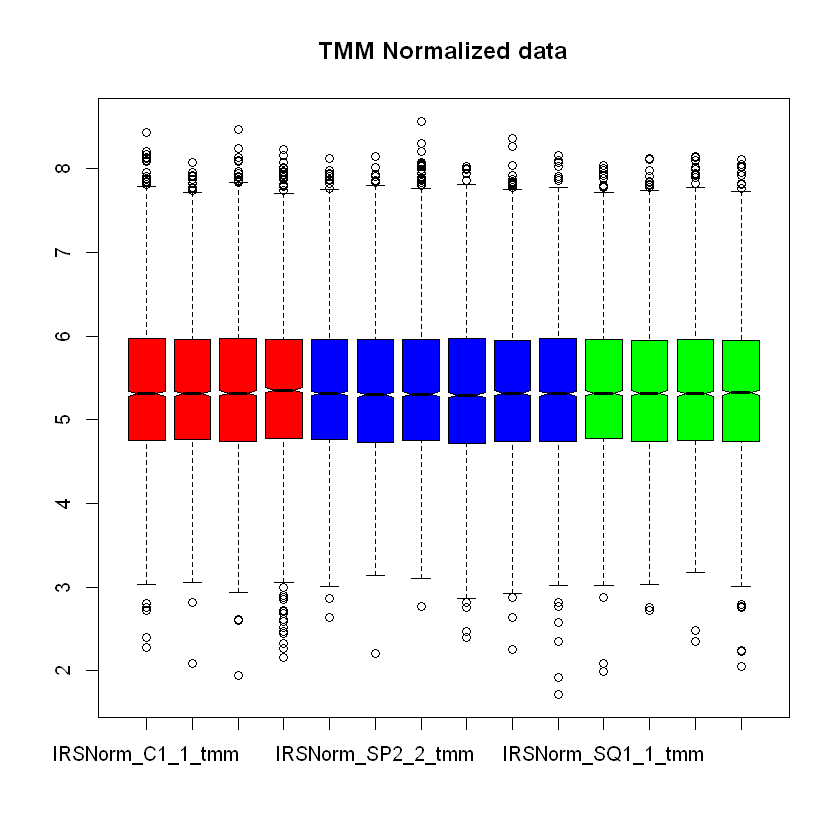

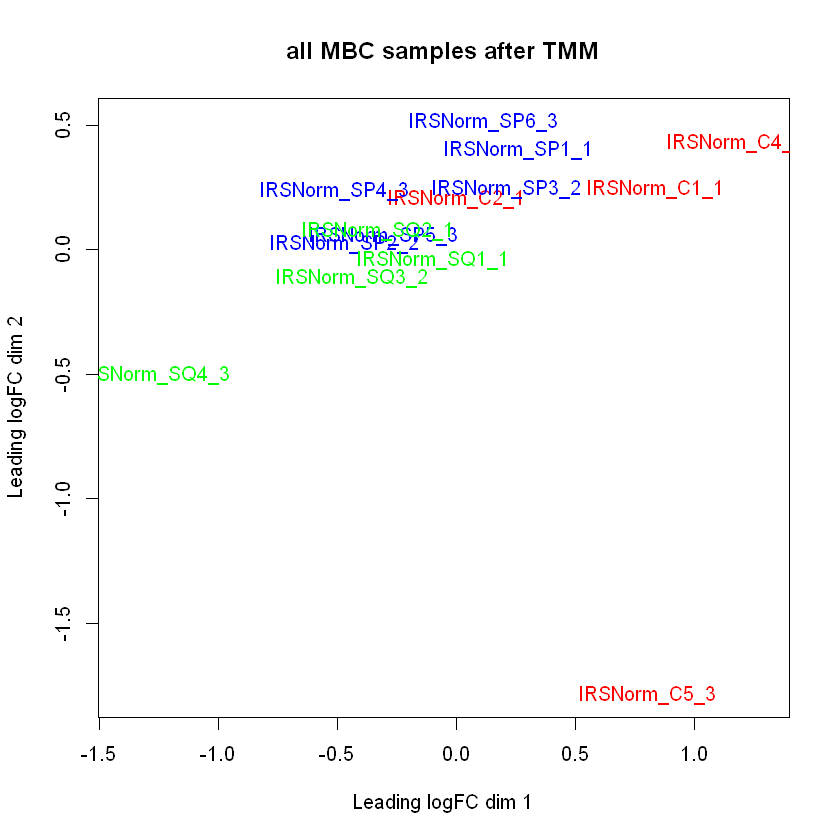

In [7]:
# get the biological sample data into a DGEList object
y <- DGEList(counts = tmt_irs, group = group, genes = accessions)

# run TMM normalization (also includes a library size factor)
y <- calcNormFactors(y)

tmt_tmm <- apply_tmm_factors(y, color = color)

# check the clustering
plotMDS(y, col = color, main = "all MBC samples after TMM")

### TMM factors are close to 1 for most samples

The IRS method already takes care of the library size type of normalizations. We could still have compositional differences between sample groups that the TMM factors would correct for. We do not have any library size or TMM factors that are too much different from 1.0.

The box plots are very similar after TMM. TMM usually gets the medians (box centers) aligned pretty well. 

In [8]:
# ============== CV function ===================================================
CV <- function(df) {
    # Computes CVs of data frame rows
        # df - data frame, 
        # returns vector of CVs (%)
    ave <- rowMeans(df)    # compute averages
    sd <- apply(df, 1, sd) # compute standard deviations
    cv <- 100 * sd / ave   # compute CVs in percent (last thing gets returned)
}

# put CVs in data frames to simplify plots and summaries
cv_sl <- data.frame(C = CV(mbc_sl[C]), Sp = CV(mbc_sl[Sp]), Sq = CV(mbc_sl[Sq])) 
cv_irs <- data.frame(C = CV(mbc_irs[C]), Sp = CV(mbc_irs[Sp]), Sq = CV(mbc_irs[Sq]))
cv_tmm <- data.frame(C = CV(tmt_tmm[C]), Sp = CV(tmt_tmm[Sp]), Sq = CV(tmt_tmm[Sq]))

# see what the median CV values are
medians <- apply(cv_sl, 2, FUN = median)
print("SLNorm median CVs by condition (%)")
round(medians, 2)

medians <- apply(cv_irs, 2, FUN = median)
print("IRSNorm median CVs by condition (%)")
round(medians, 2)

medians <- apply(cv_tmm, 2, FUN = median)
print("Final median CVs by condition (%)")
round(medians, 2)

[1] "SLNorm median CVs by condition (%)"


C    Sp    Sq 
51.13 48.05 44.15

[1] "IRSNorm median CVs by condition (%)"


C    Sp    Sq 
34.68 31.22 22.25

[1] "Final median CVs by condition (%)"


C    Sp    Sq 
30.99 30.46 21.58

### IRS and TMM reduce the CV significantly

We have about 50% median CVs before IRS. IRS reduces those to around 30%. TMM makes some small additional improvements.

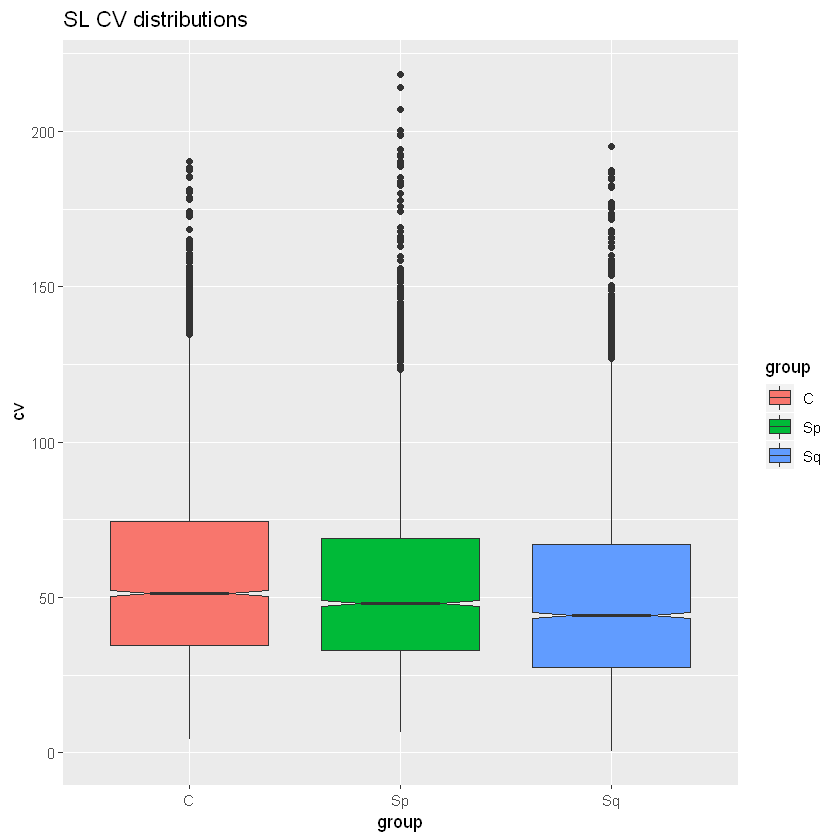

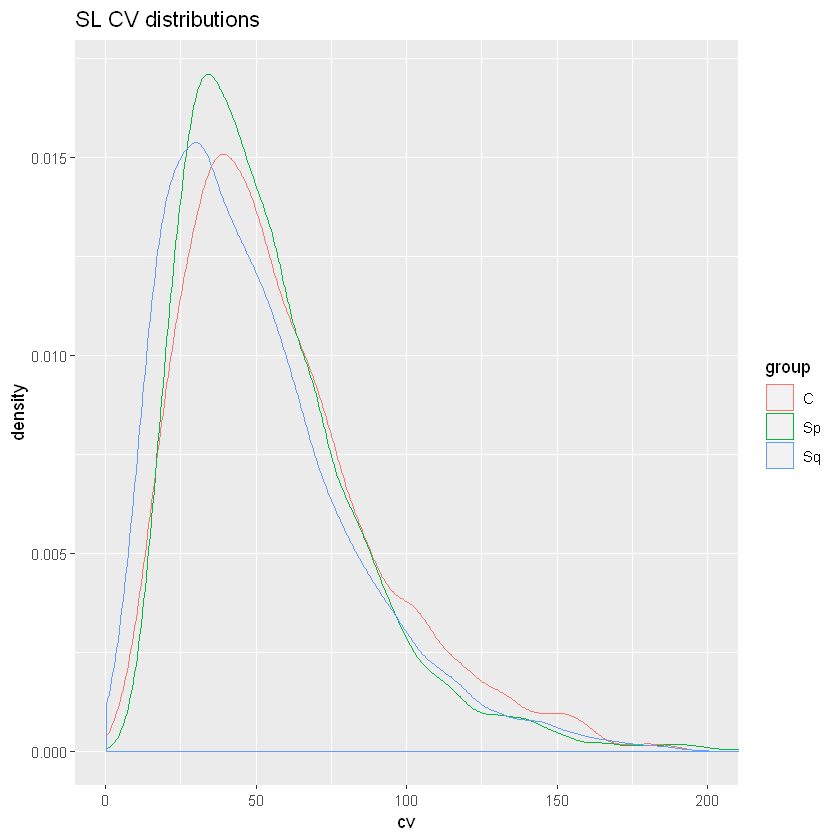

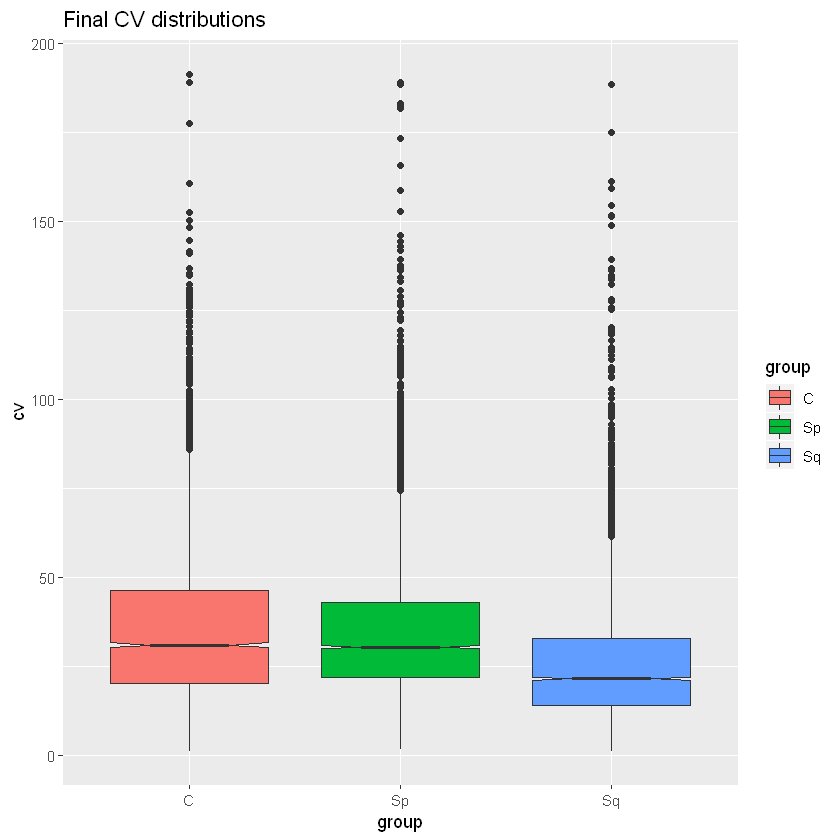

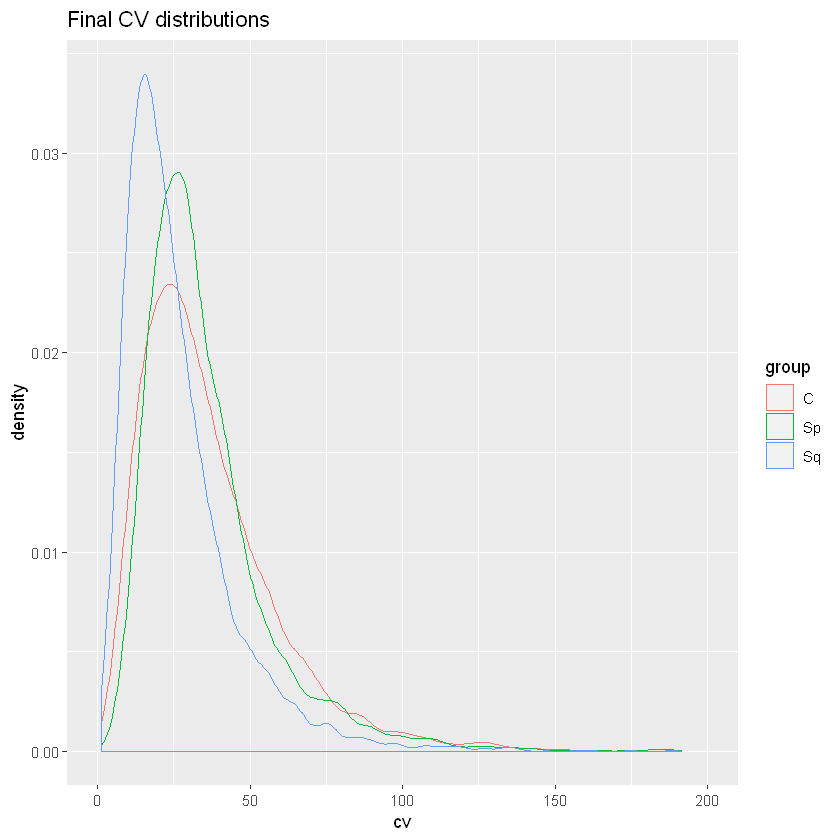

In [9]:
# see what the CV distibutions look like
# need long form for ggplot
long_cv_sl <- gather(cv_sl, key = "group", value = "cv")

# traditional boxplots
ggplot(long_cv_sl, aes(x = group, y = cv, fill = group)) +
  geom_boxplot(notch = TRUE) +
  ggtitle("SL CV distributions")

# density plots
ggplot(long_cv_sl, aes(x = cv, color = group)) +
  geom_density() +
  coord_cartesian(xlim = c(0, 200)) +
  ggtitle("SL CV distributions")

# need long form for ggplot
long_cv_tmm <- gather(cv_tmm, key = "group", value = "cv") 

# traditional boxplots
ggplot(long_cv_tmm, aes(x = group, y = cv, fill = group)) +
  geom_boxplot(notch = TRUE) +
  ggtitle("Final CV distributions")

# density plots
ggplot(long_cv_tmm, aes(x = cv, color = group)) +
  geom_density() +
  coord_cartesian(xlim = c(0, 200)) +
  ggtitle("Final CV distributions")

## EdgeR statistical testing starts here

### Compute the shared variance trend

One of the most powerful features of edgeR (and limma) is computing variances across larger numbers of genes (proteins) to get more robust variance estimates for small replicate experiments. Here, we have 27 samples across all conditions to use to improve the variance estimates and reduce false positive differential expression (DE) candidates. We have an edgeR `estimateDisp` function that does all of this and a visualization function to check the result.

We loaded the IRS data into `DGEList` object `y` a few cells above and did the normalization step. We need to estimate the dispersion parameters before we can do the actual statistical testing. This only needs to be done once. Each exact test will take two conditions and compare them using the normalization factors and dispersion estimates saved in `y`.

Design matrix not provided. Switch to the classic mode.


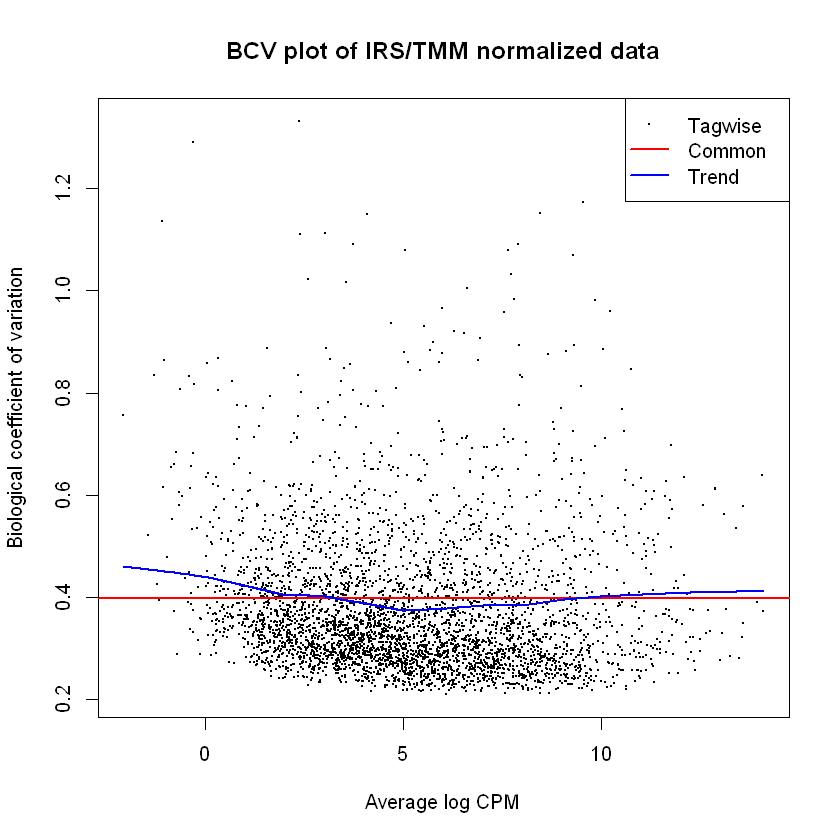

In [10]:
# compute dispersions and plot BCV
y <- estimateDisp(y)
plotBCV(y, main = "BCV plot of IRS/TMM normalized data")

### These sample have some relatively high inherent variance

## <a name="C_Sp"></a>(1) Chondroid versus Spindle

We will specify the pair of interest (MBC chondroid and MBC spindle samples) for the exact test in edgeR and use the experiment-wide dispersion. The `decideTestsDGE` call will tell us how many up and down regulated candidates we have at an FDR of 0.10. The `topTags` call does the Benjamini-Hochberg multiple testing corrections. We save the test results in `tt`. We use a handy MA (mean-average) plotting function from `limma` to visualize the DE candidates, and then check the p-value distribution.

       Sp-C
Down     71
NotSig 4060
Up        1

,genes,logFC,logCPM,PValue,FDR
1851,sp|Q96GK7|FAH2A_HUMAN,-1.648142,5.331302,2.871105e-10,1.186341e-06
118,sp|P51888|PRELP_HUMAN,-3.458825,11.281252,1.322063e-09,2.731383e-06
1529,sp|Q9Y240|CLC11_HUMAN,-2.614426,6.969464,1.447641e-07,1.993884e-04
1896,sp|P03950|ANGI_HUMAN,-2.083618,5.660273,5.408733e-07,5.587221e-04
3628,sp|Q16674|MIA_HUMAN,-2.551102,2.840939,1.165264e-06,8.082992e-04
731,sp|Q08431|MFGM_HUMAN,-3.082443,8.824011,1.173716e-06,8.082992e-04
115,sp|P21810|PGS1_HUMAN,-2.291709,11.324761,1.564347e-06,9.234115e-04
1105,sp|Q06828|FMOD_HUMAN,-2.829256,7.248830,3.937366e-06,2.033649e-03
1906,sp|O95460|MATN4_HUMAN,-2.944350,5.201491,4.832176e-06,2.218506e-03
2108,sp|P00746|CFAD_HUMAN,-1.393377,4.949472,5.385383e-06,2.225240e-03


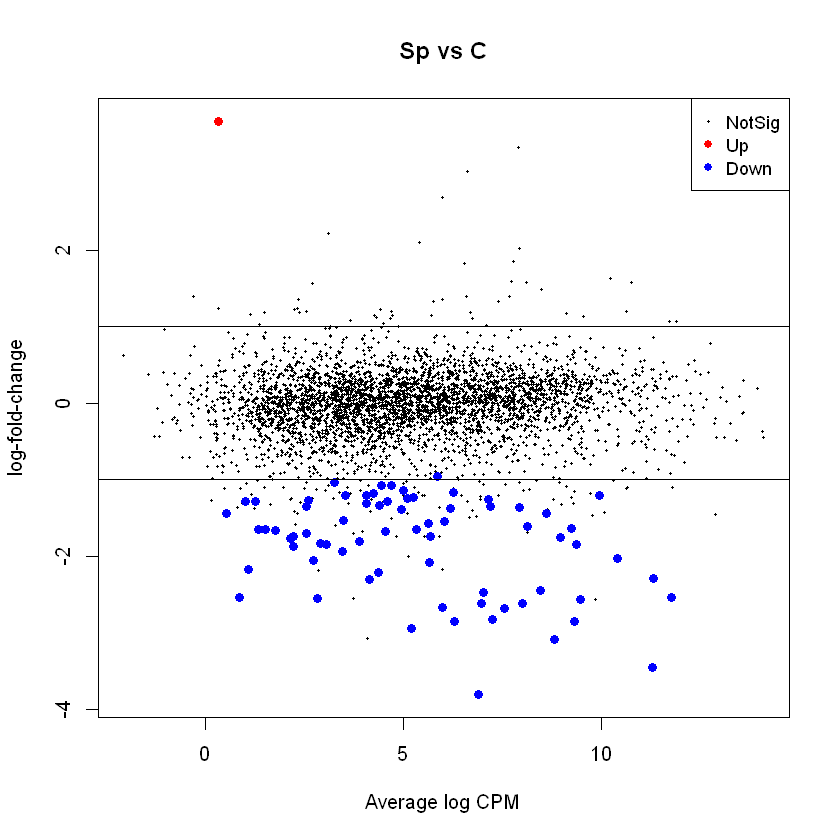

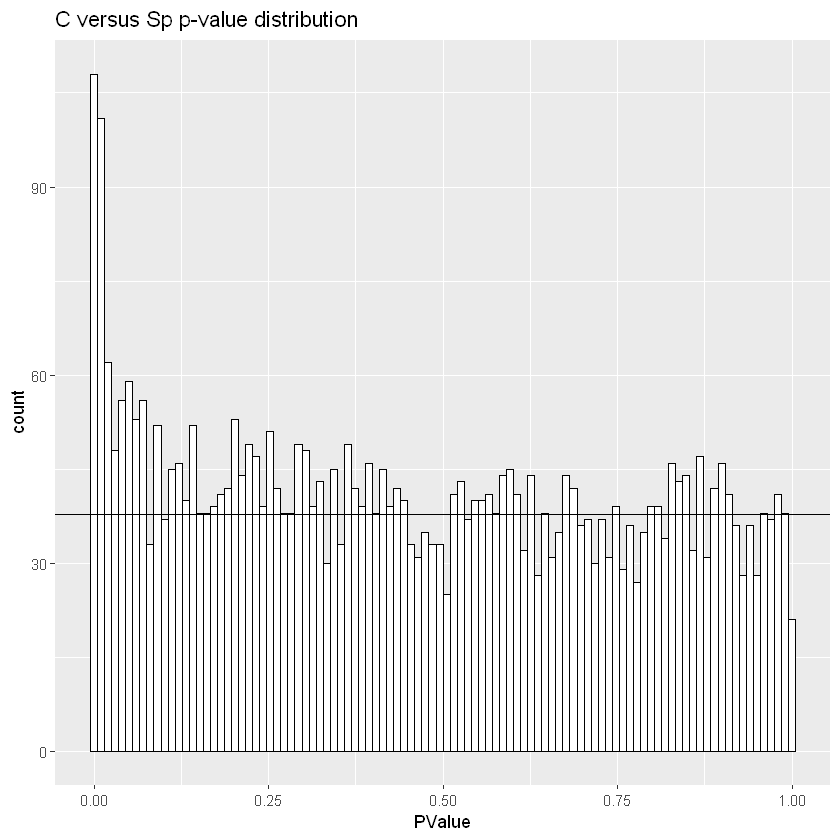

In [11]:
# the exact test object has columns like fold-change, CPM, and p-values
et <- exactTest(y, pair = c("C", "Sp"))

# this counts up, down, and unchanged genes (proteins) at 10% FDR
summary(decideTestsDGE(et, p.value = 0.10))

# the topTags function adds the BH FDR values to an exactTest data frame 
# make sure we do not change the row order (the sort.by parameter)!
topTags(et)$table
tt <- topTags(et, n = Inf, sort.by = "none")

# make an MD plot (like MA plot)
plotMD(et, p.value = 0.10)
abline(h = c(-1, 1), col = "black")

# check the p-value distribution
ggplot(tt$table, aes(PValue)) + 
  geom_histogram(bins = 100, fill = "white", color = "black") + 
  geom_hline(yintercept = mean(hist(et$table$PValue, breaks = 100, 
                                    plot = FALSE)$counts[26:100])) +
  ggtitle("C versus Sp p-value distribution")

### We have 72 DE candidates

We have 72 proteins with differential expression. The p-value distribution looks good. We have a flat distribution from non-DE proteins and a spike at low p-values from the true DE candidates. The DE candidates are skewed towards down regulation in spindle compared to chondroid (just 1 up versus 71 down). 

### Compute averages, flag candidates, and save the pair-wise test results

We will add the statistical testing results (logFC, p-values, and FDR), condition intensity averages, and candidate status to the `results` data frame (which has the TMM-normalized data) and also accumulate all of the three comparisons into `all_results`.

Even though we do not have many candidates, we will still make the MA plots, scatter plots, and volcano plot using ggplot2. We will also look at the distribution of log2 expression ratios separated by differential expression (DE) category. The Benjamini-Hochberg corrected edgeR p-values are used to categorize the DE candidates: no > 0.10 > low > 0.05 > med > 0.01 > high.

In [12]:
# get the results summary
results <- collect_results(tmt_tmm, tt$table, C, "C", Sp, "Sp")

# make column names unique by adding comparison (for the accumulated frame)
results_temp  <- results
colnames(results_temp) <- str_c(colnames(results), "_C_Sp")

# accumulate the testing results
all_results <- cbind(all_results, results_temp)

### Count candidates and look at fold-change distributions

candidate,n
high,19
med,26
low,27
no,4060


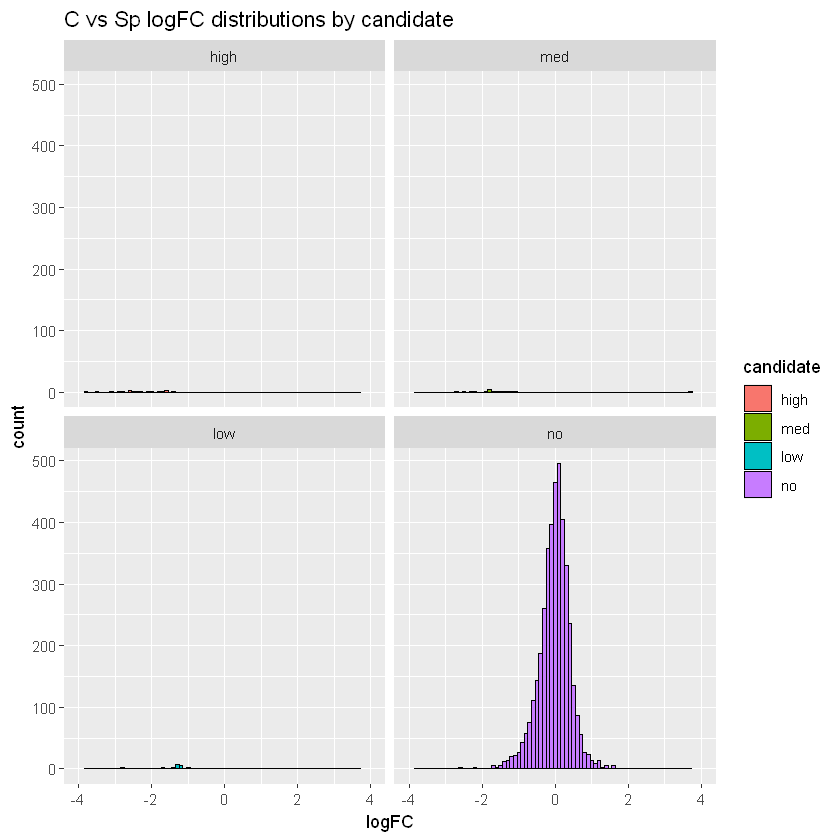

In [13]:
# see how many candidates by category
results %>% count(candidate)

# plot log2 fold-changes by category
ggplot(results, aes(x = logFC, fill = candidate)) +
  geom_histogram(binwidth=0.1, color = "black") +
  facet_wrap(~candidate) +
  coord_cartesian(xlim = c(-4, 4)) +
  ggtitle("C vs Sp logFC distributions by candidate")

## Main summary plots

We have many comparisons to visualize, so we will use functions to generate a series of plots. We will make: an MA plot with candidates highlighted by color, faceted MA plots separated by candidate status, a scatter plot with candidates highlighted by color, faceted scatter plots separated by candidate status, and a volcano plot with candidates highlighted by color. The solid black lines in the MA and scatter plots are the 1-to-1 lines; the dotted lines are 2-fold change lines.

### MA plots

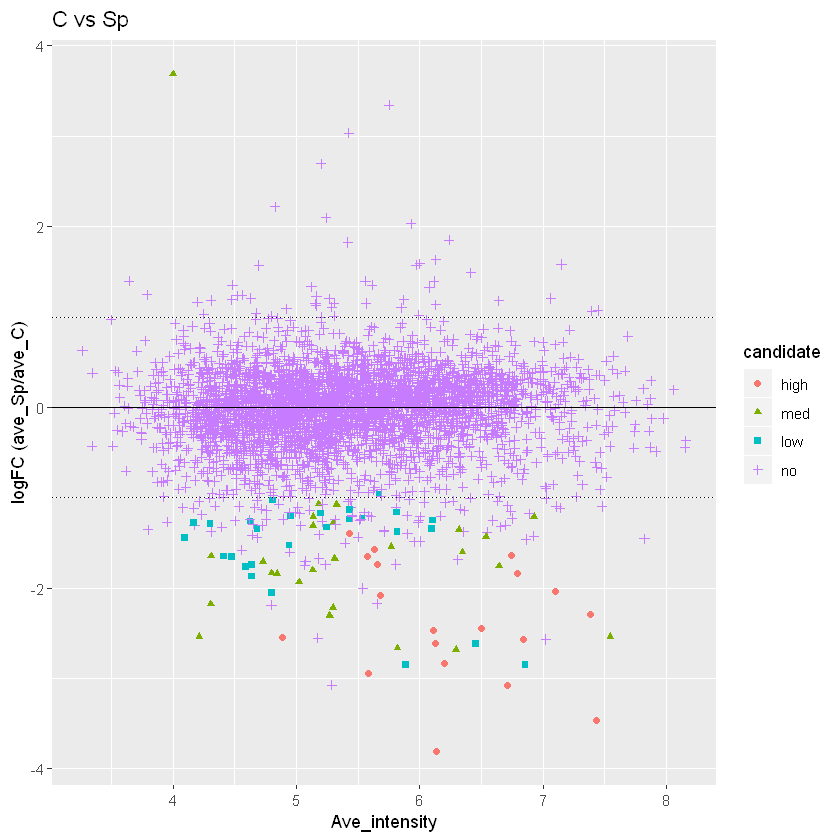

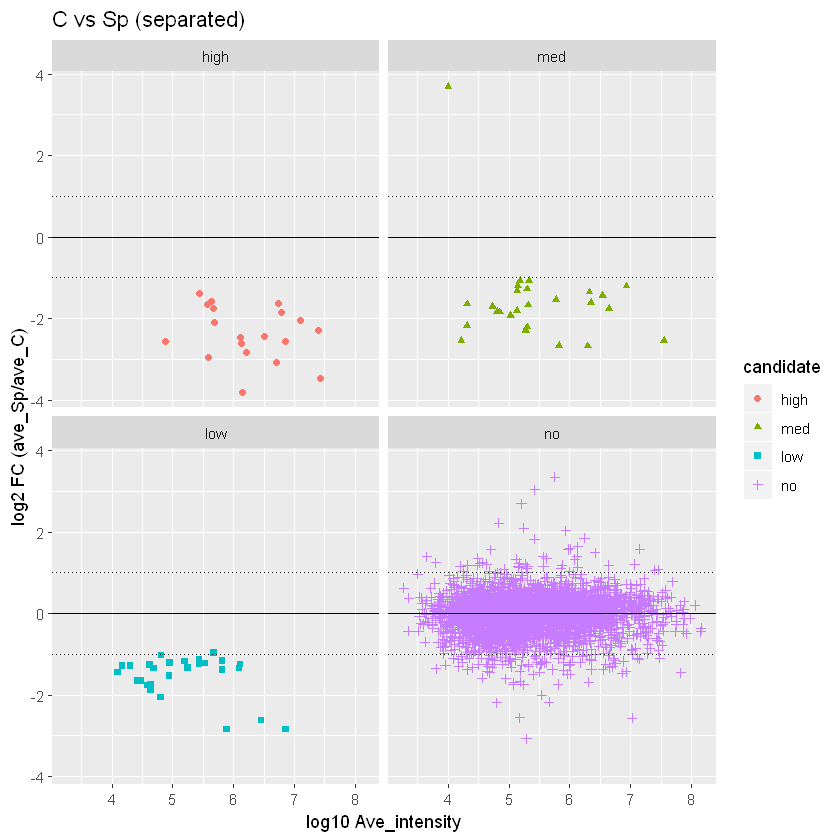

In [14]:
# make MA plots
MA_plots(results, "ave_C", "ave_Sp", "C vs Sp")

### Scatter plots

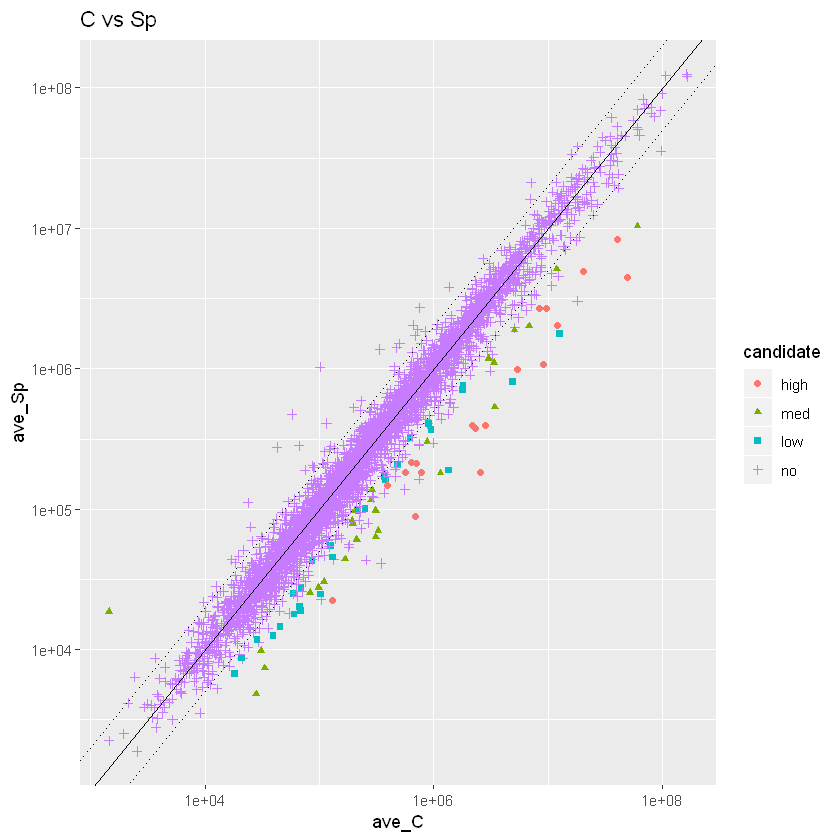

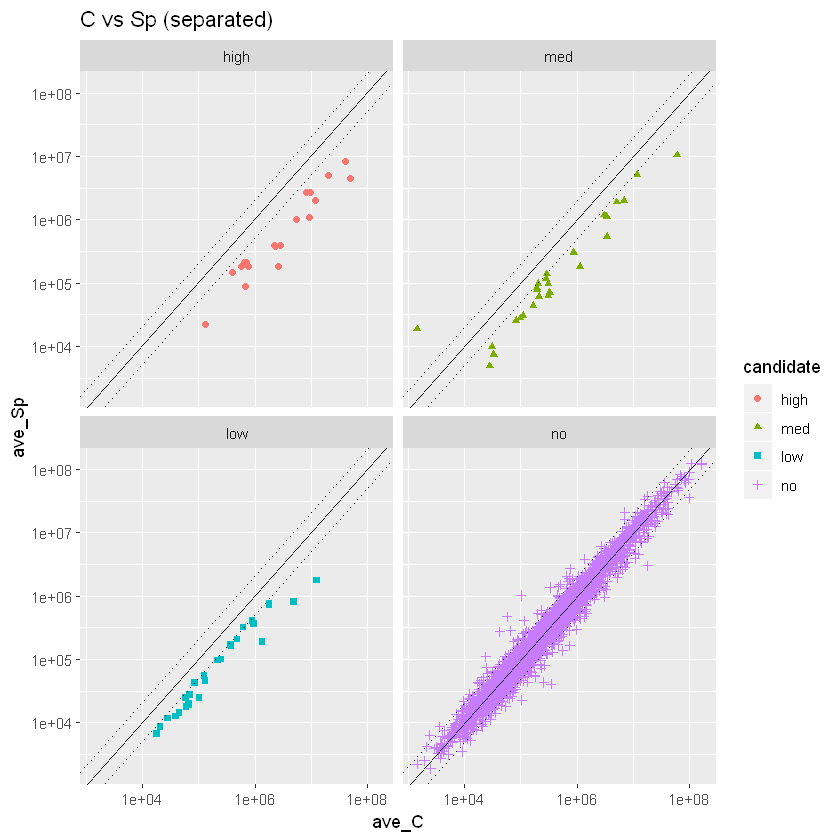

In [15]:
# make scatter plots
scatter_plots(results, "ave_C", "ave_Sp", "C vs Sp")

### Volcano plot

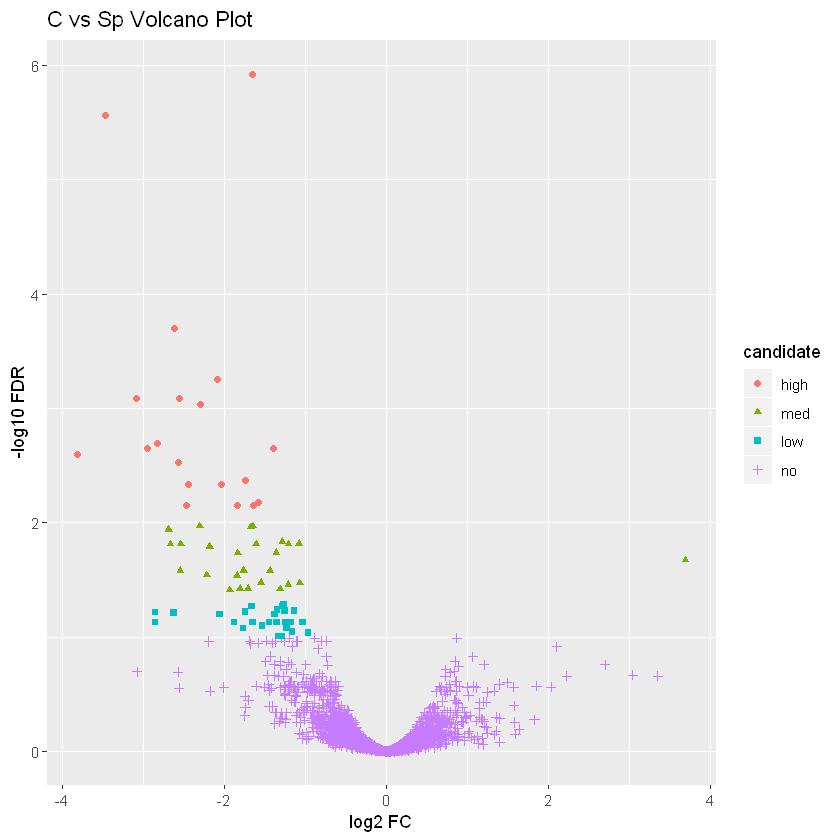

In [16]:
# make a volcano plot
volcano_plot(results, "ave_C", "ave_Sp", "C vs Sp")

### Many proteins are down regulated in the spindle subtype

Although we have a strong skew towards down expressed DE candidates, the candidates look good. We have robust differential expression changes. There are many proteins that are down regulated significantly (large negative fold changes) in the spindle subtype.

### Check some individual protein expression

We can look at the data for the top 10 (by edgeR BH-corrected p-values) up and down regulated proteins.

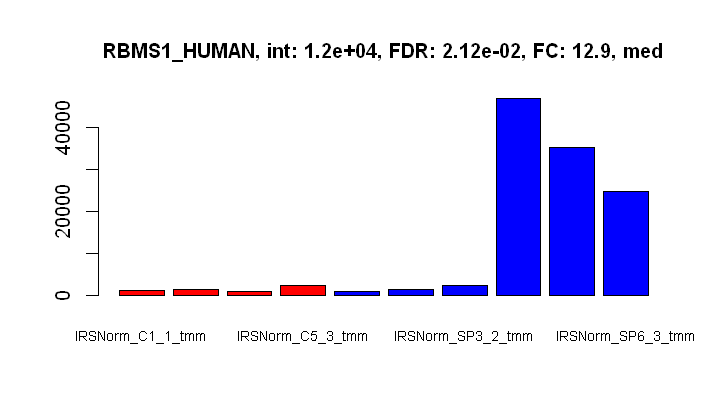

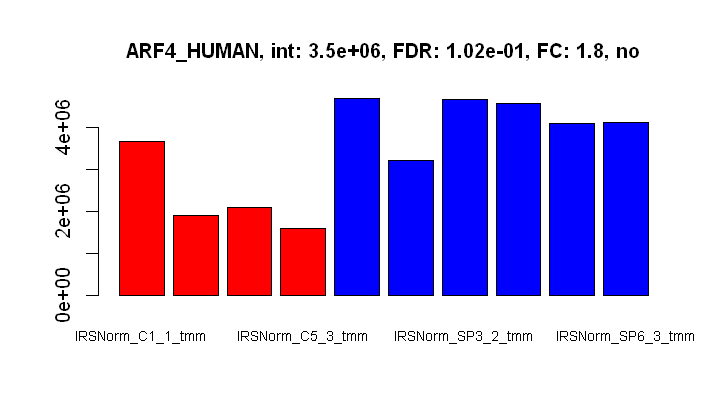

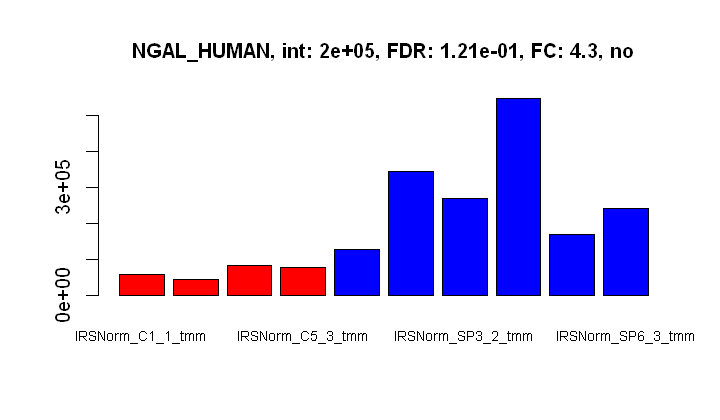

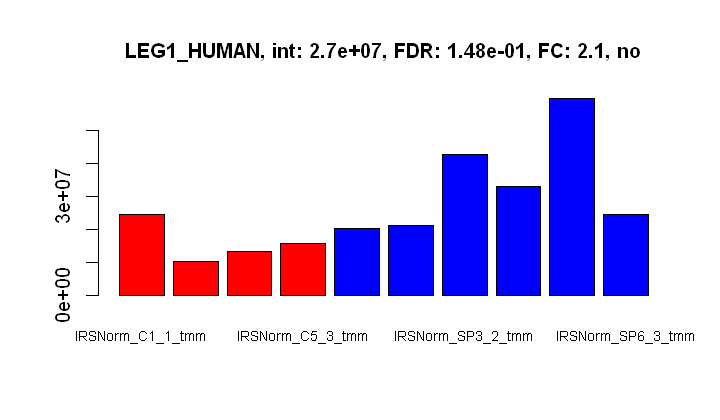

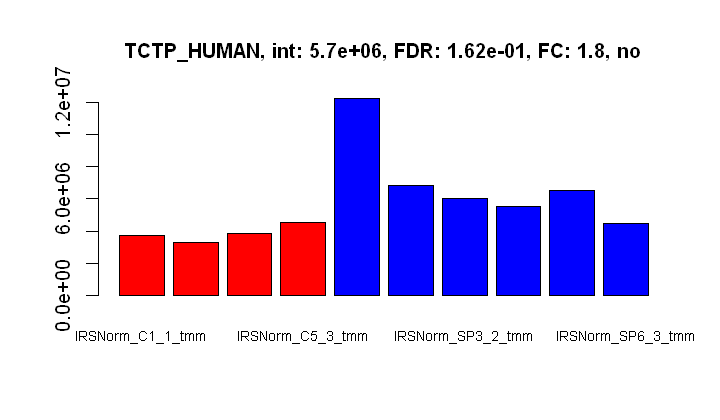

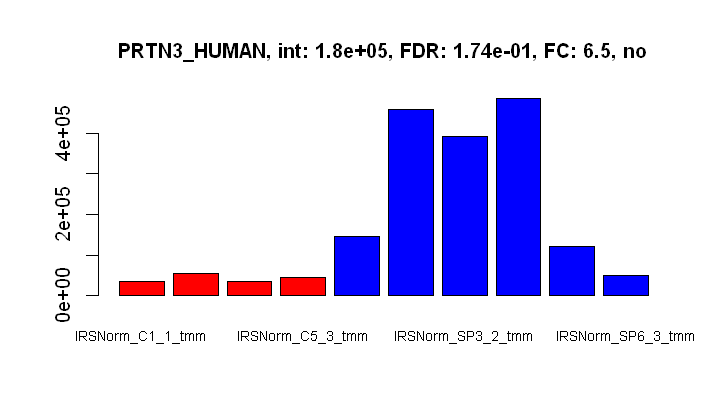

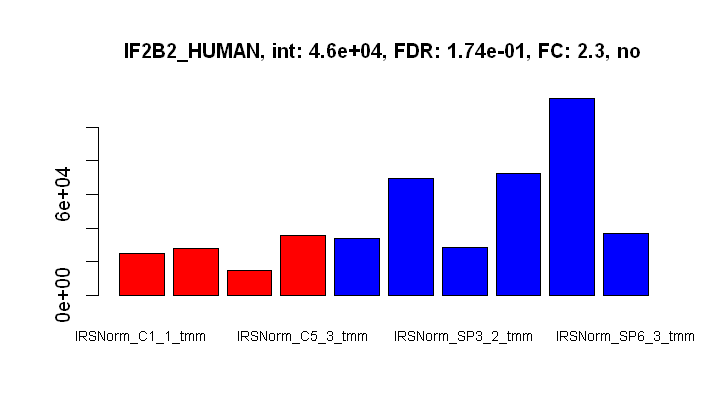

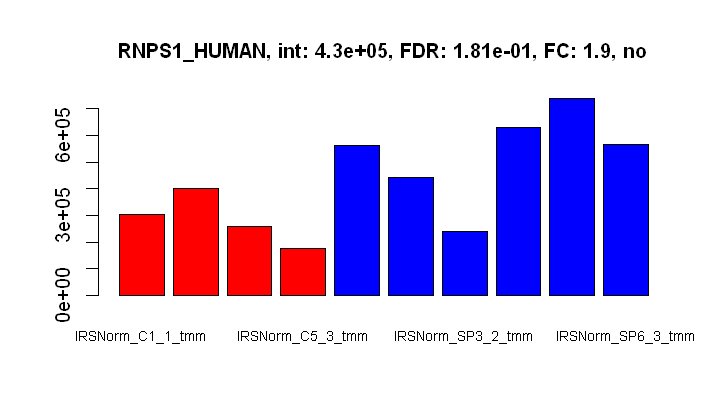

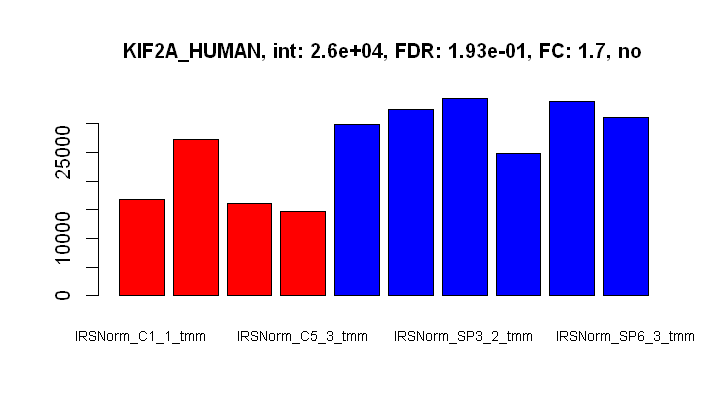

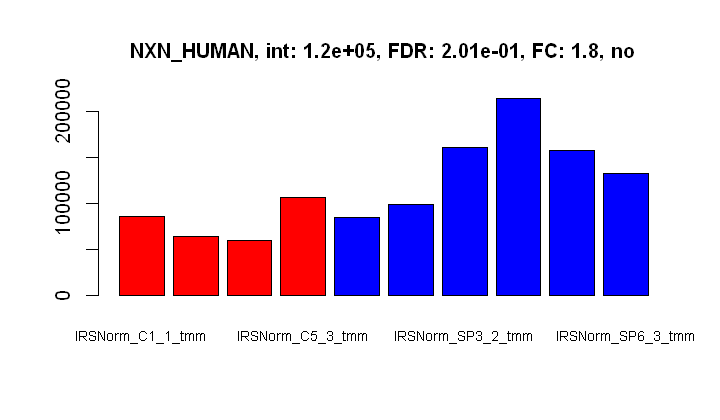

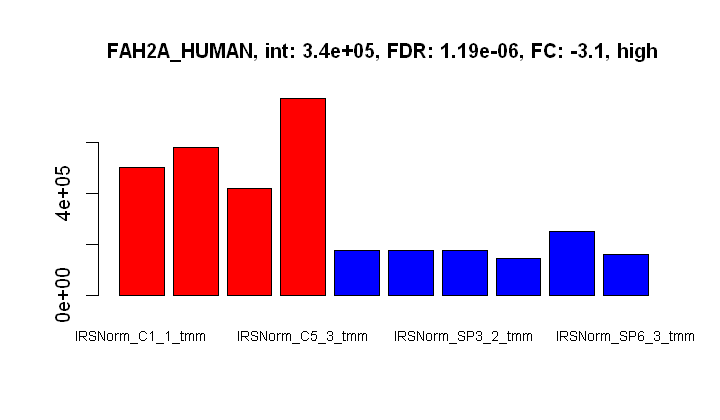

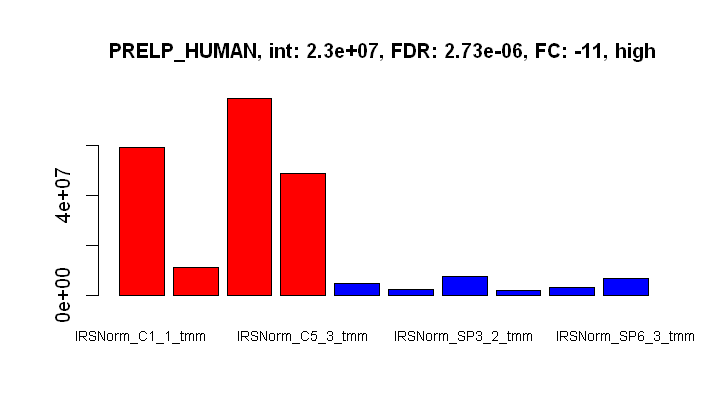

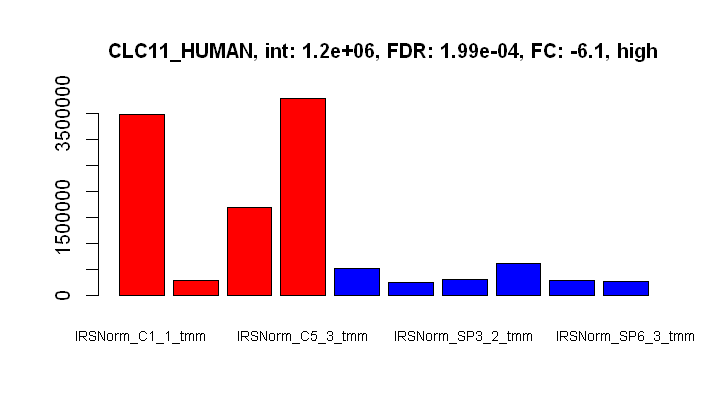

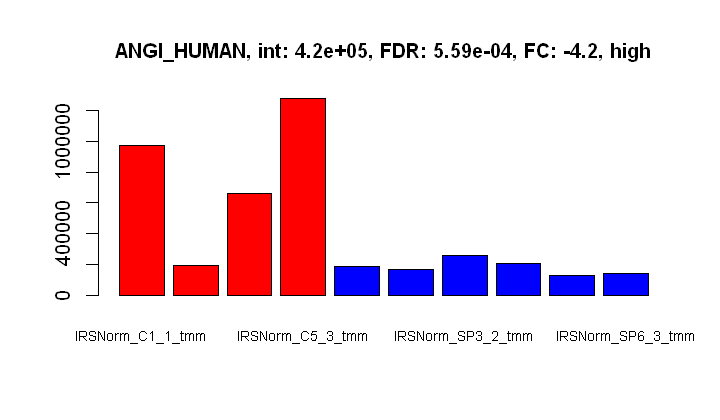

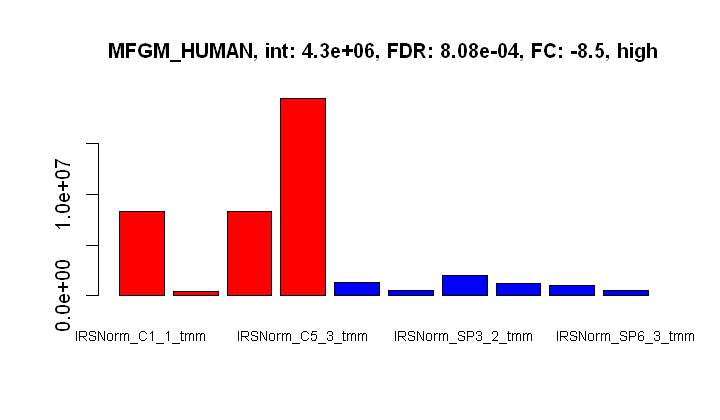

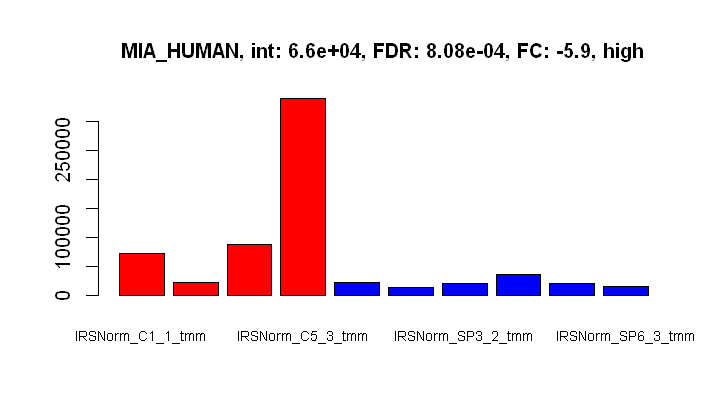

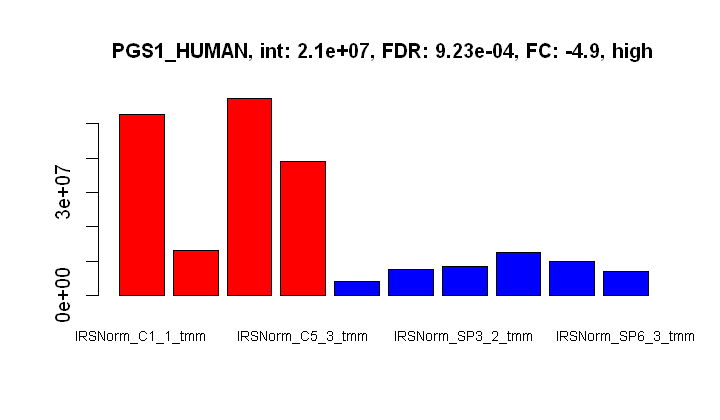

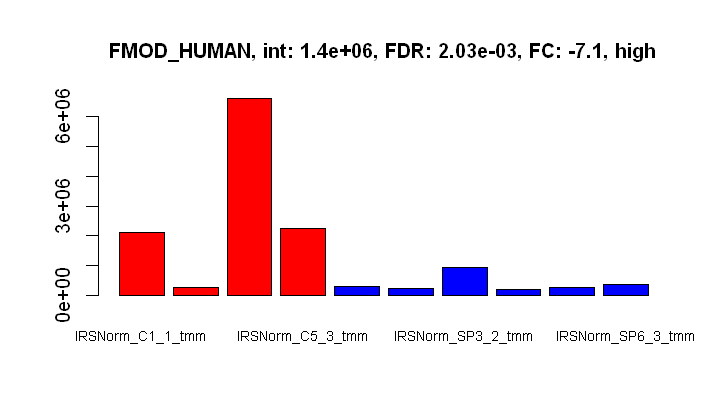

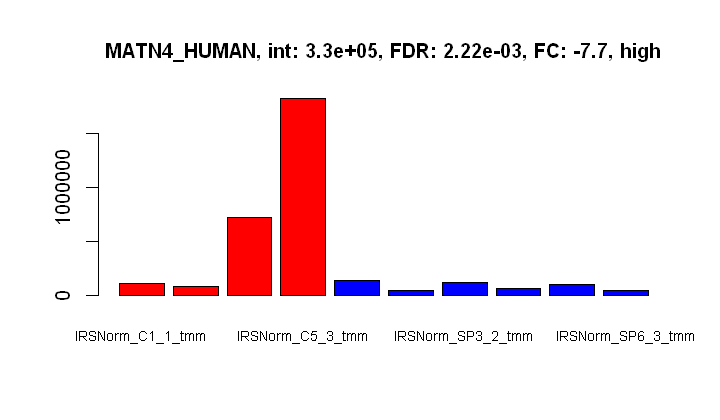

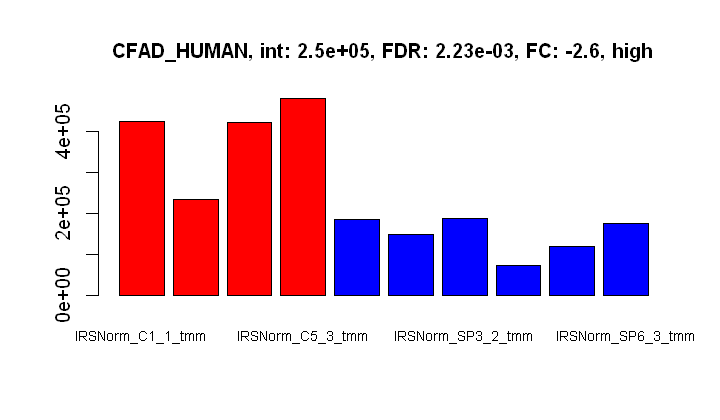

In [17]:
# look at the top 10 candidates in each direction (up in Sp, then down in Sp)
set_plot_dimensions(6, 3.5)
plot_top_tags(results, 4, 6, 10)
set_plot_dimensions(7, 7)

## <a name="C_Sq"></a> (2) Chondroid versus Squamous

We will do the same testing to compare chondroid metaplastic breast cancer samples to squamous metaplastic breast cancer samples.

       Sq-C
Down     63
NotSig 4030
Up       39

,genes,logFC,logCPM,PValue,FDR
864,sp|P31944|CASPE_HUMAN,4.881829,7.511859,6.780814e-10,1.588955e-06
1851,sp|Q96GK7|FAH2A_HUMAN,-1.843175,5.331302,7.690974e-10,1.588955e-06
1529,sp|Q9Y240|CLC11_HUMAN,-3.301827,6.969464,2.964615e-08,4.083263e-05
731,sp|Q08431|MFGM_HUMAN,-4.169934,8.824011,9.904771e-08,1.023163e-04
3628,sp|Q16674|MIA_HUMAN,-3.231550,2.840939,2.686815e-07,2.220384e-04
1059,sp|P47929|LEG7_HUMAN,2.807372,6.201222,5.643456e-07,3.886460e-04
118,sp|P51888|PRELP_HUMAN,-3.156068,11.281252,1.918461e-06,1.132440e-03
371,sp|P23297|S10A1_HUMAN,-5.708345,9.846850,5.468042e-06,2.824244e-03
1225,sp|P09467|F16P1_HUMAN,2.833223,6.712292,7.056083e-06,3.239526e-03
2102,sp|P24158|PRTN3_HUMAN,4.719013,5.987455,9.760971e-06,3.502048e-03


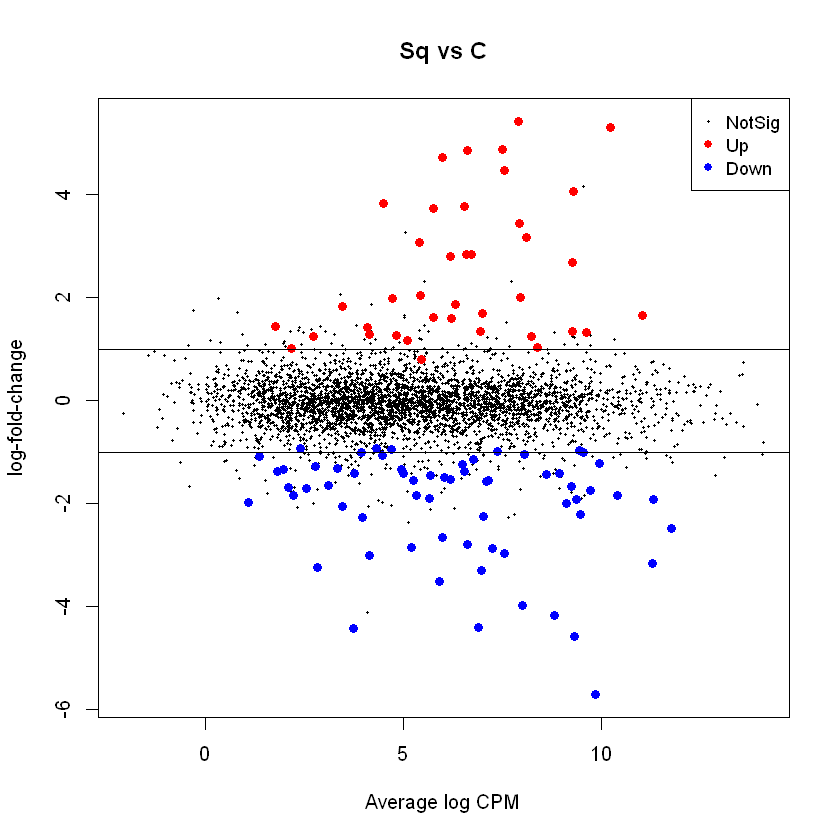

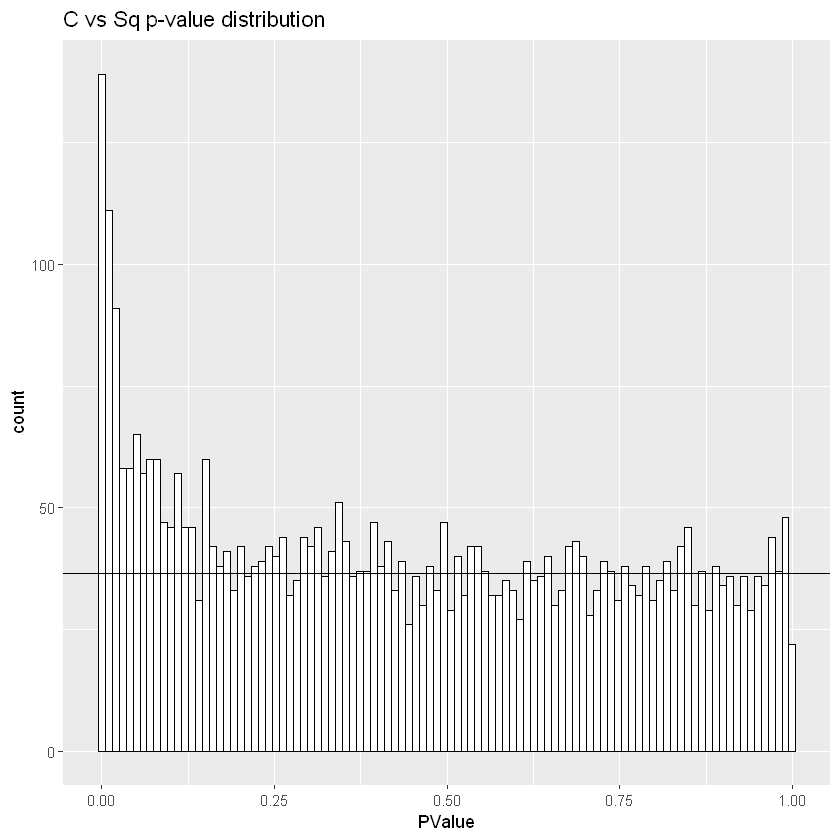

In [18]:
# the exact test object has columns like fold-change, CPM, and p-values
et <- exactTest(y, pair = c("C", "Sq"))

# this counts up, down, and unchanged genes (proteins) at 10% FDR
summary(decideTestsDGE(et, p.value = 0.10))

# the topTags function adds the BH FDR values to an exactTest data frame 
# make sure we do not change the row order (the sort.by parameter)!
topTags(et)$table
tt <- topTags(et, n = Inf, sort.by = "none")

# make an MD plot (like MA plot)
plotMD(et, p.value = 0.10)
abline(h = c(-1, 1), col = "black") # 2-fold change lines

# check the p-value distribution
ggplot(tt$table, aes(PValue)) + 
  geom_histogram(bins = 100, fill = "white", color = "black") + 
  geom_hline(yintercept = mean(hist(et$table$PValue, breaks = 100, 
                                    plot = FALSE)$counts[26:100])) +
  ggtitle("C vs Sq p-value distribution")

### We have more balanced candidates

We have 102 candidates between the chondroid and squamous subtypes. We have a more balanced pattern of up and down regulation. The p-value distribution looks good. 

## Compute averages, flag candidates, and save the pair-wise test results

We will add the statistical testing results (logFC, p-values, and FDR), condition intensity averages, and candidate status to the `results` data frame (which has the TMM-normalized data) and also accumulate all of the three comparisons into `all_results`.

In [19]:
# get the results summary
results <- collect_results(tmt_tmm, tt$table, C, "C", Sq, "Sq")

# make column names unique by adding comparison
results_temp  <- results
colnames(results_temp) <- str_c(colnames(results), "_C_Sq")

# accumulate the testing results
all_results <- cbind(all_results, results_temp)

### Count candidates and look at fold-change distributions

candidate,n
high,20
med,40
low,42
no,4030


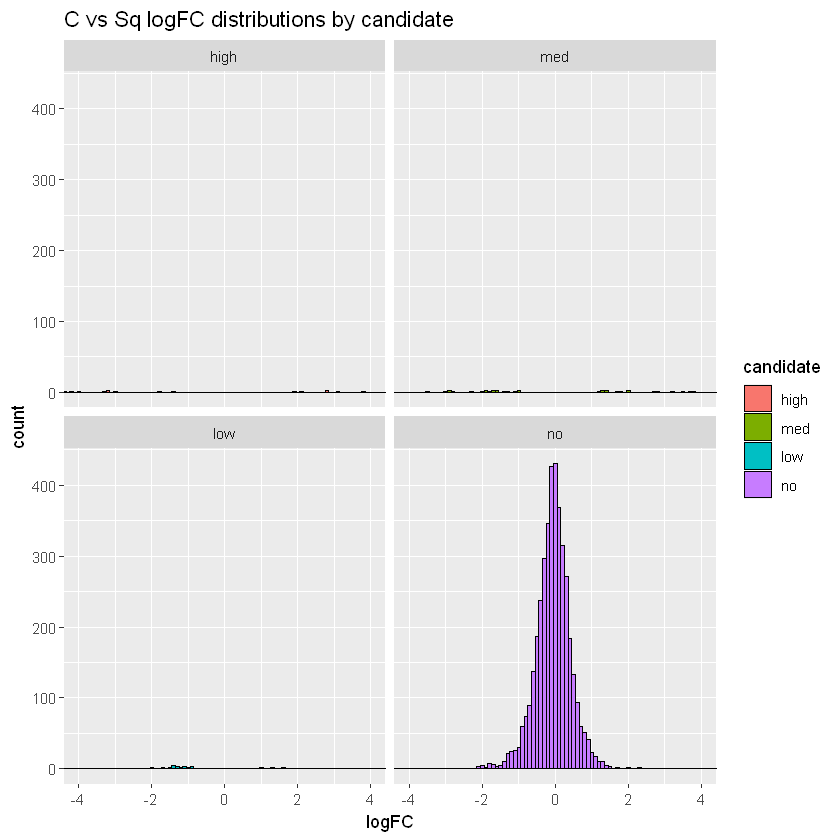

In [20]:
# see how many candidates by category
results %>% count(candidate)

# plot log2 fold-changes by category
ggplot(results, aes(x = logFC, fill = candidate)) +
  geom_histogram(binwidth=0.1, color = "black") +
  facet_wrap(~candidate) +
  coord_cartesian(xlim = c(-4, 4)) +
  ggtitle("C vs Sq logFC distributions by candidate")

### MA plots

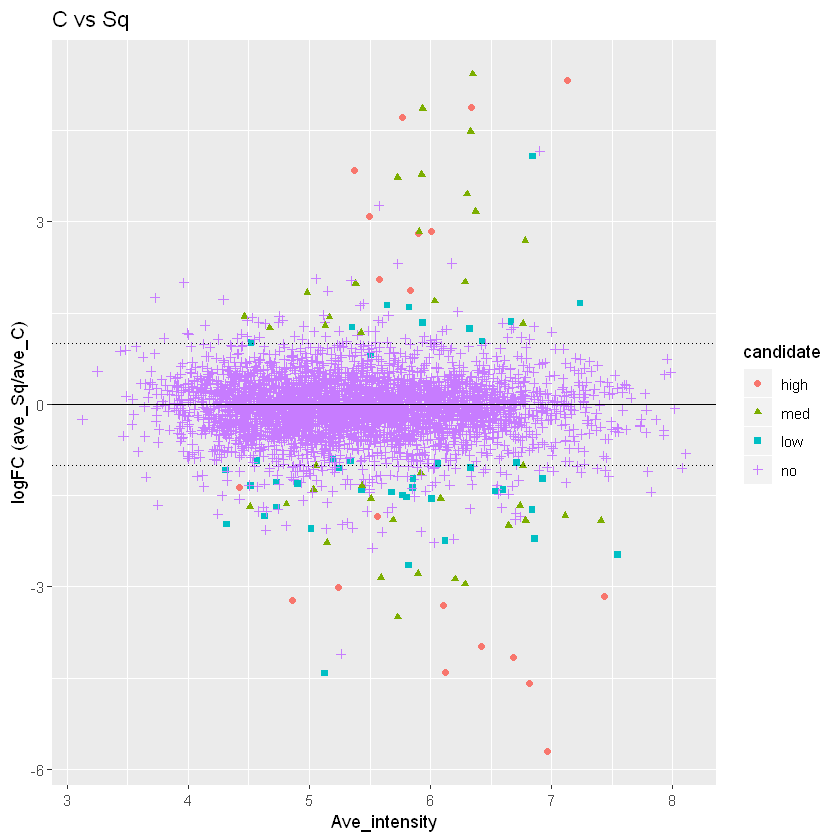

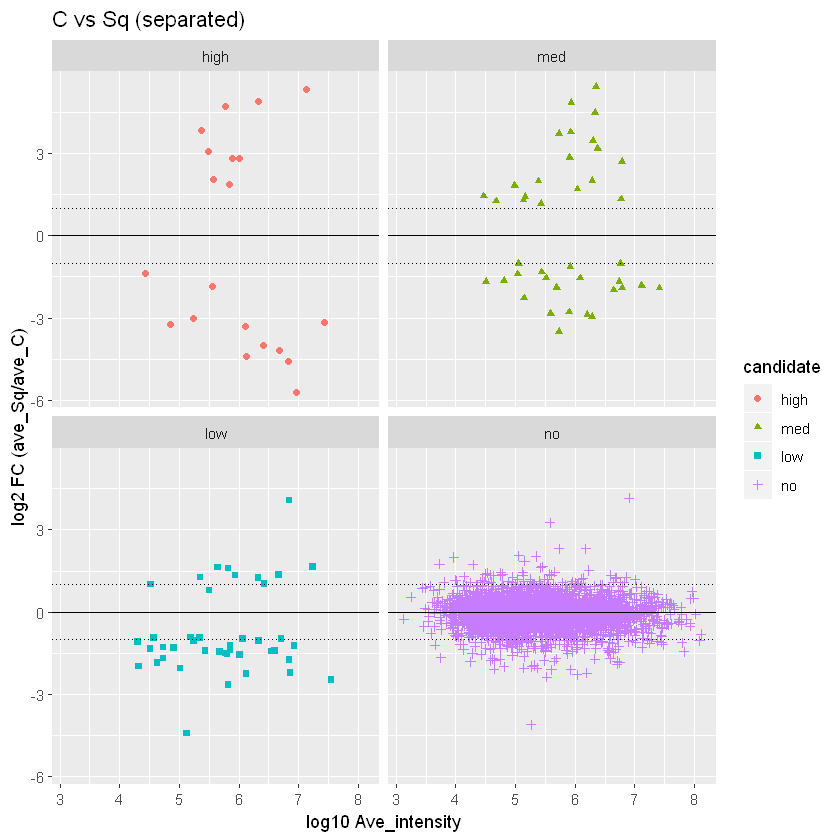

In [21]:
# make MA plots
MA_plots(results, "ave_C", "ave_Sq", "C vs Sq")

### Scatter plots

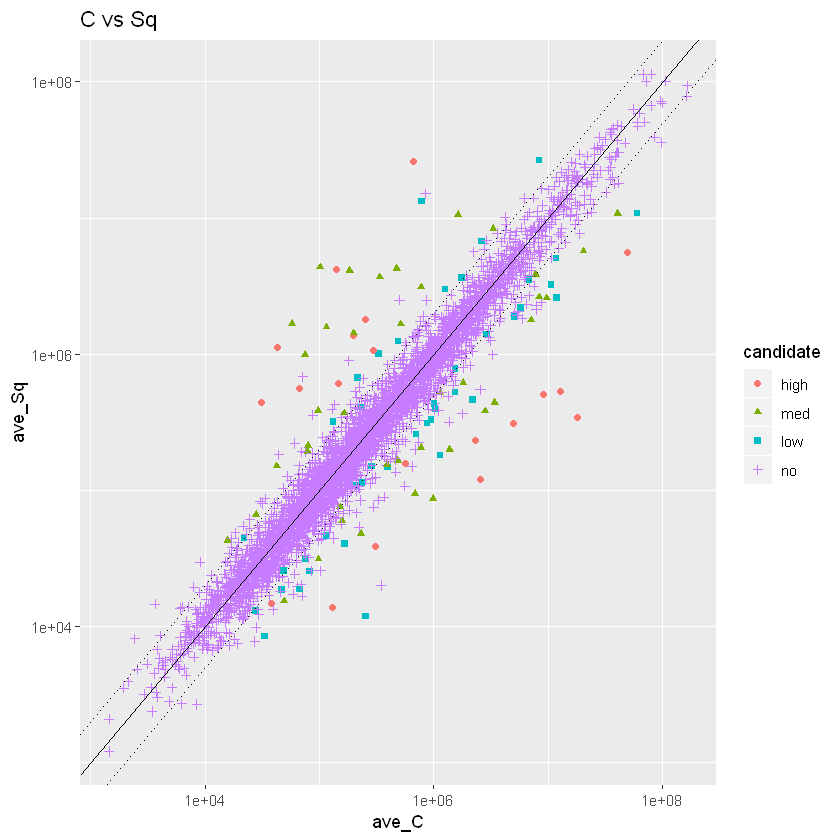

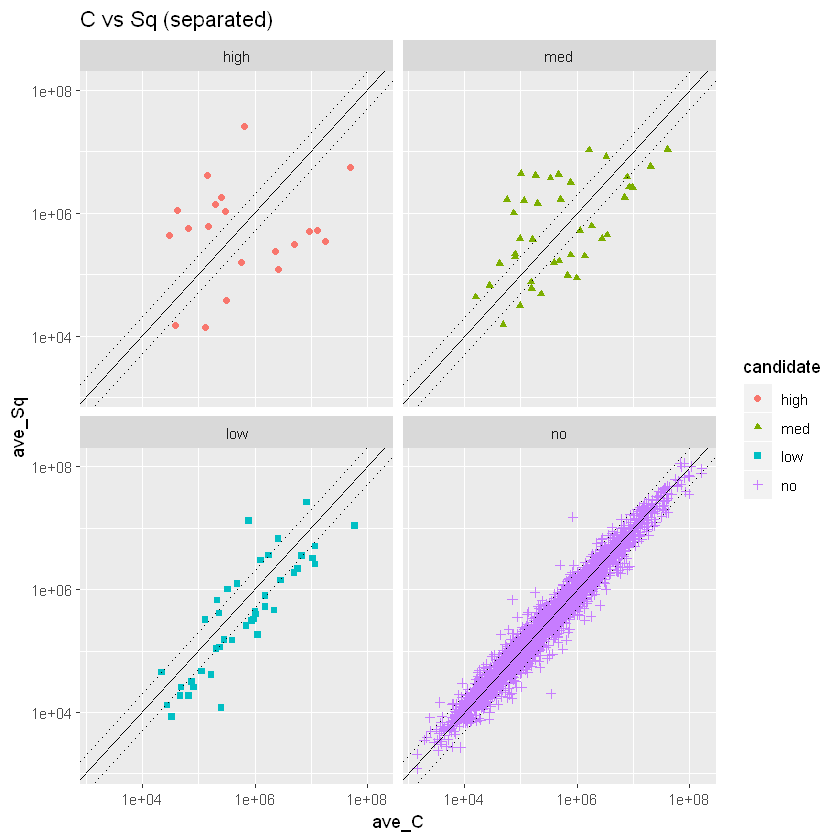

In [22]:
# make scatter plots
scatter_plots(results,  "ave_C", "ave_Sq", "C vs Sq")

### Volcano plot

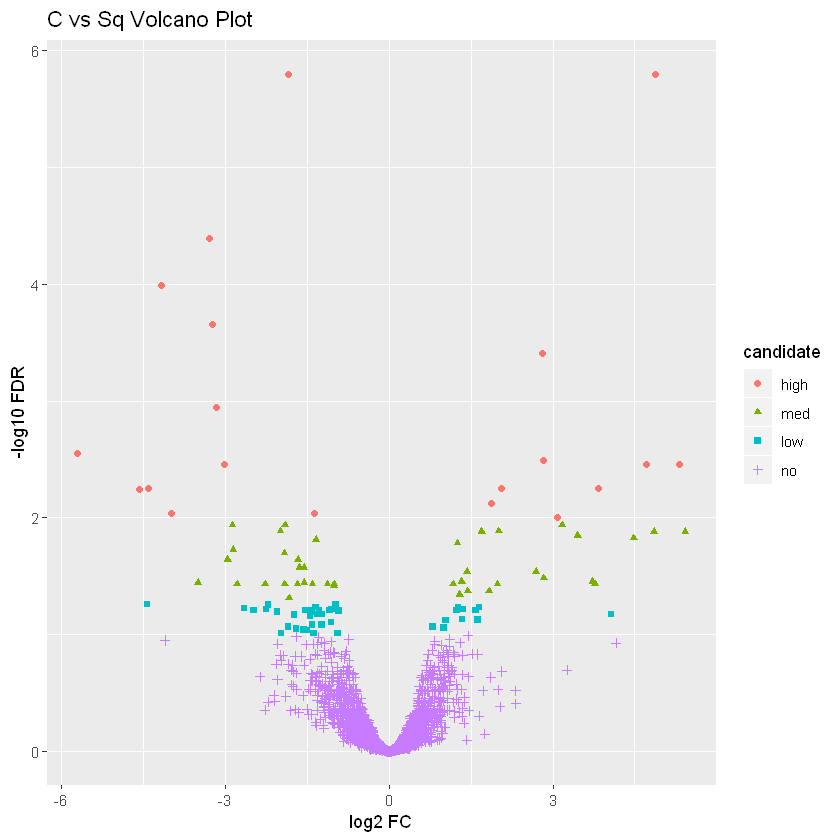

In [23]:
# make a volcano plot
volcano_plot(results,  "ave_C", "ave_Sq", "C vs Sq")

### The candidates have nice characteristics

The DE candidates look good in all of the visualizations. These main plots use average intensities per subtype.

### Check some individual protein expression

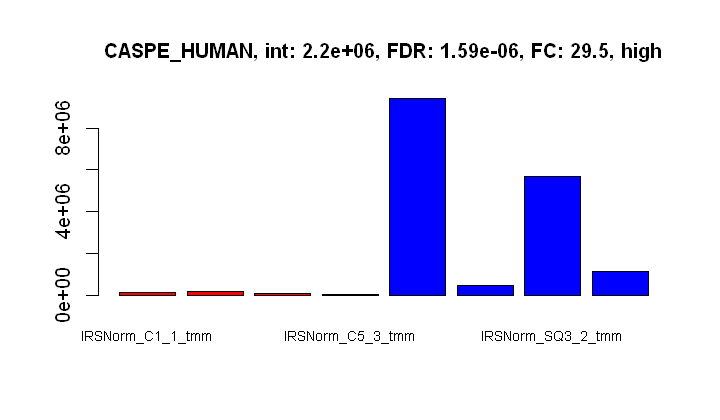

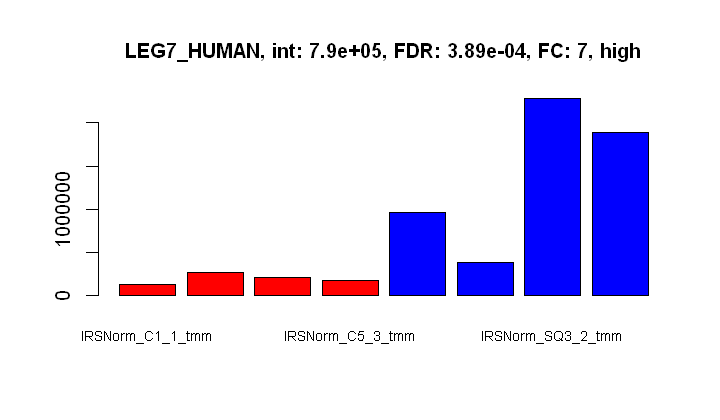

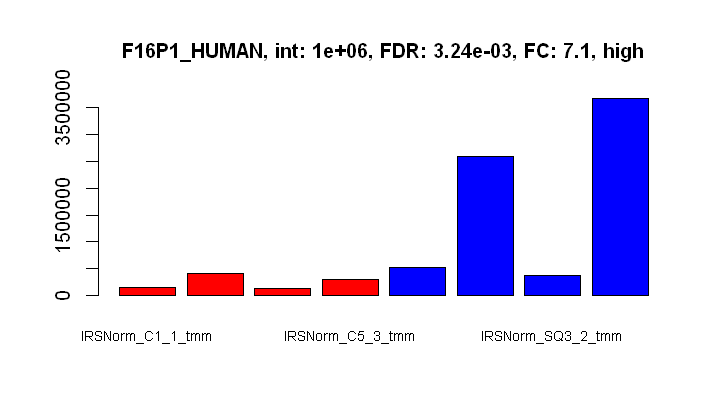

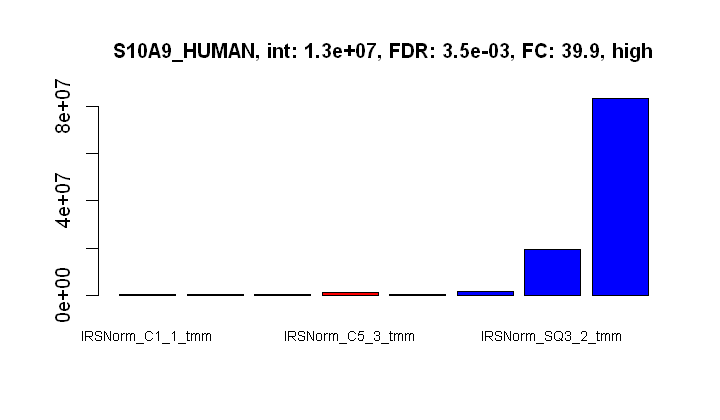

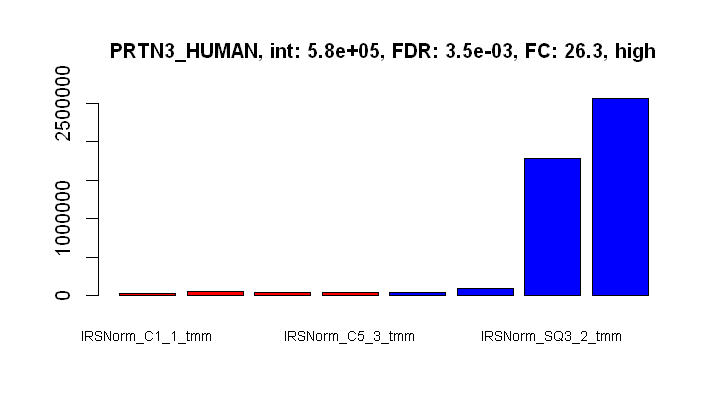

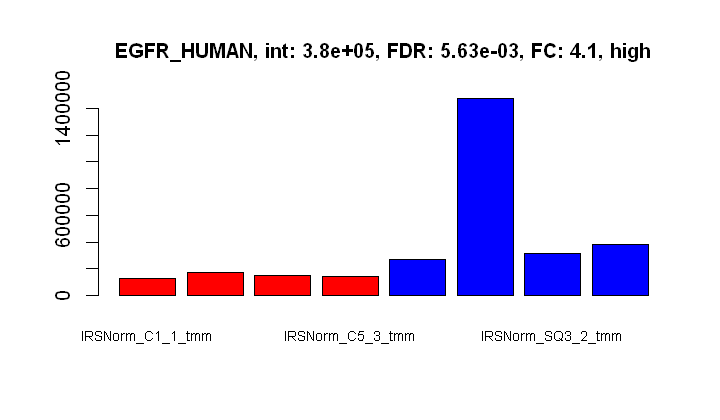

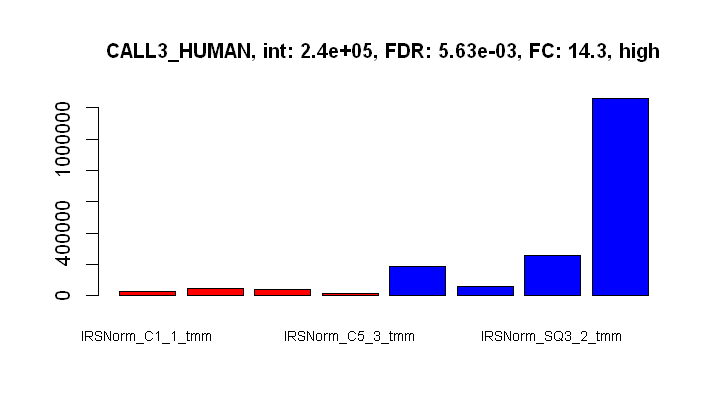

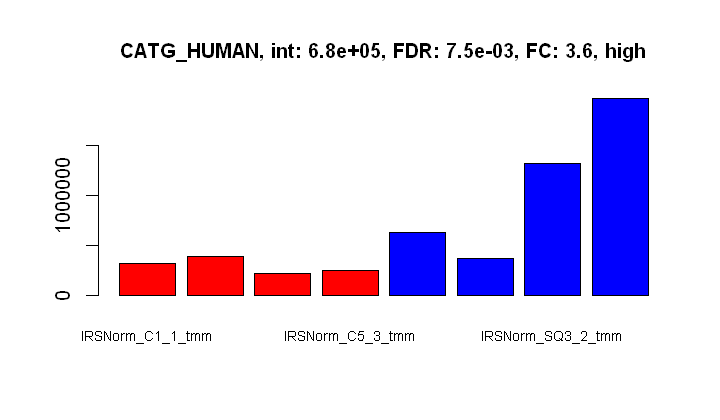

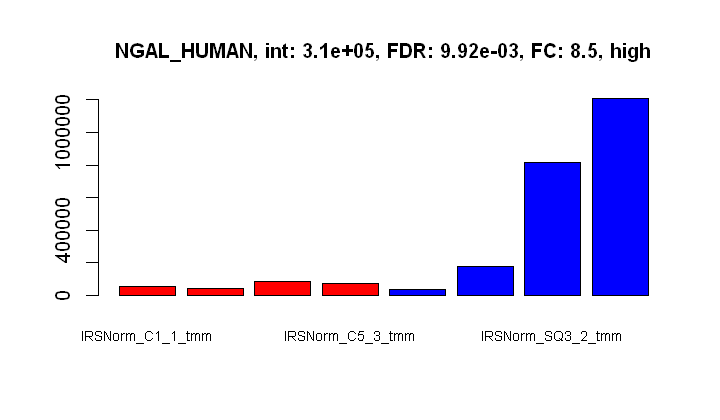

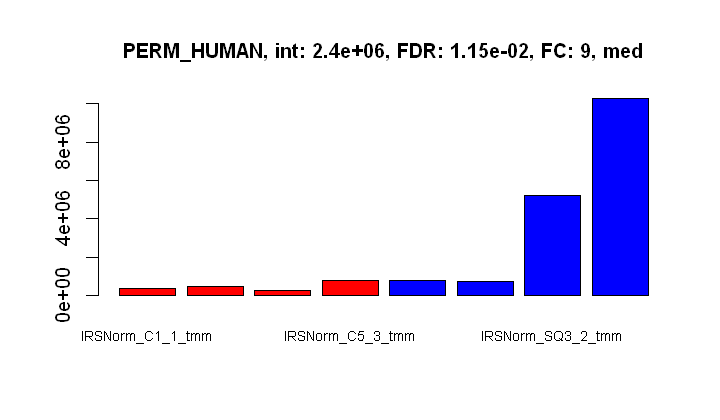

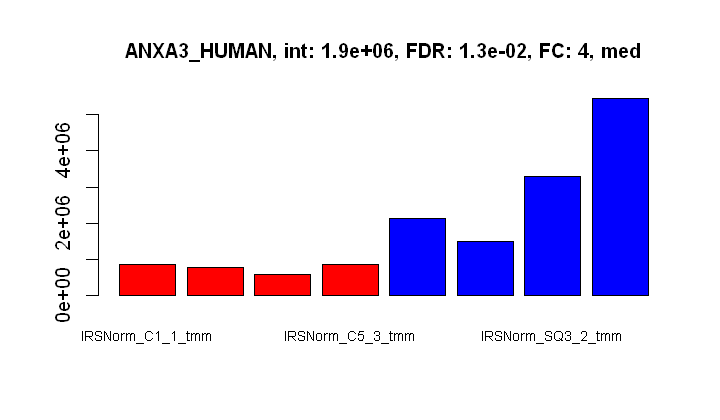

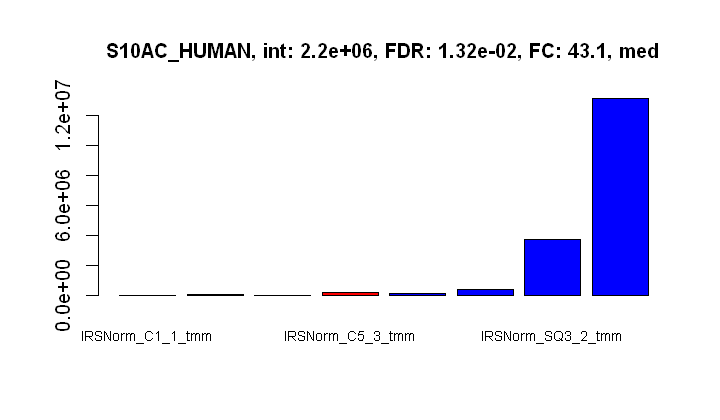

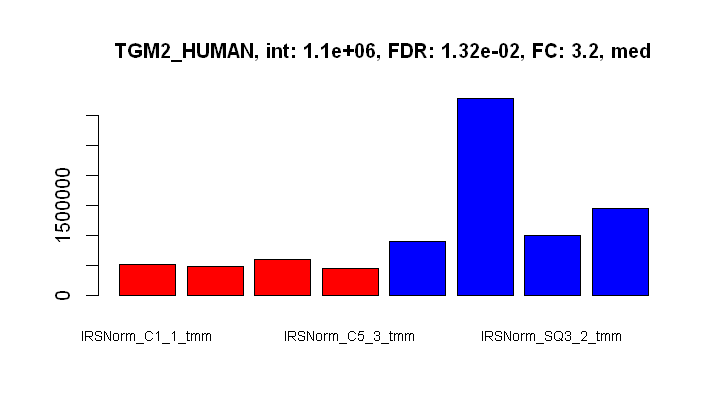

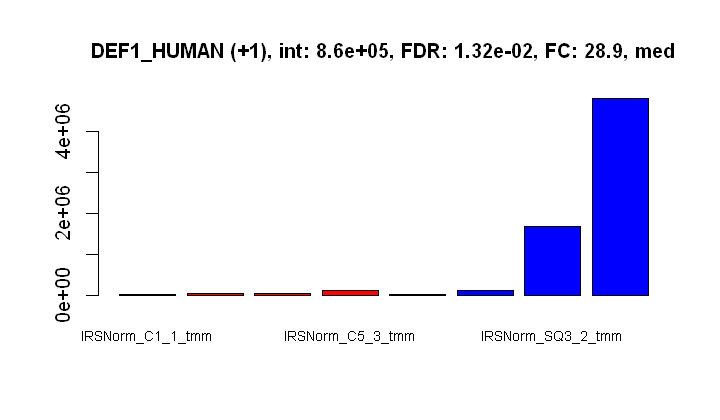

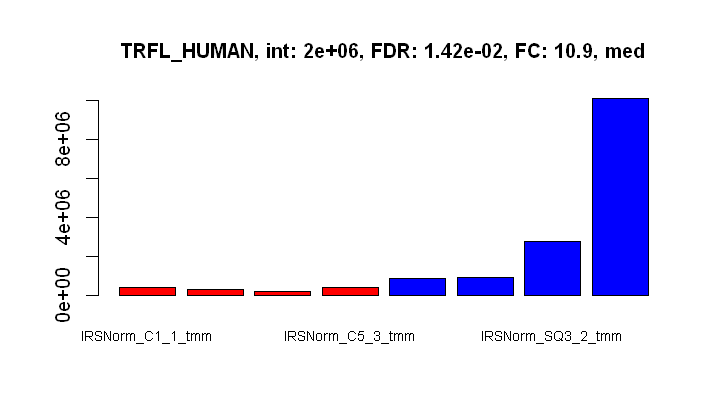

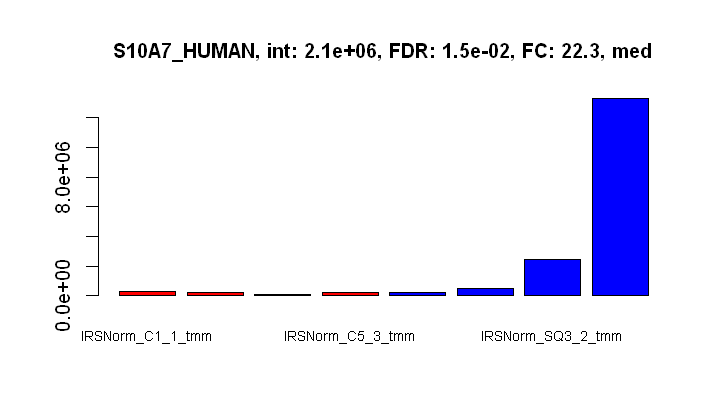

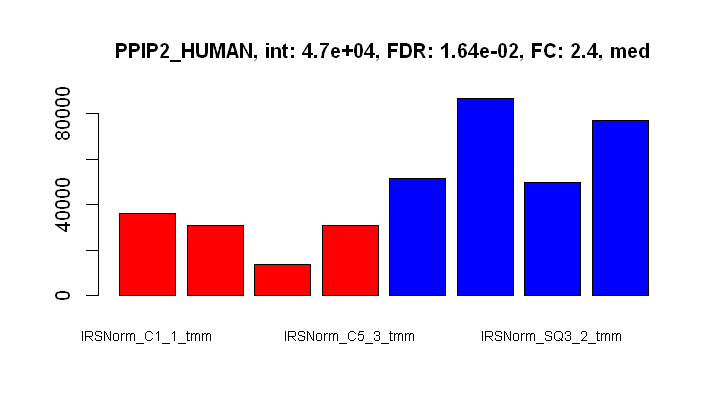

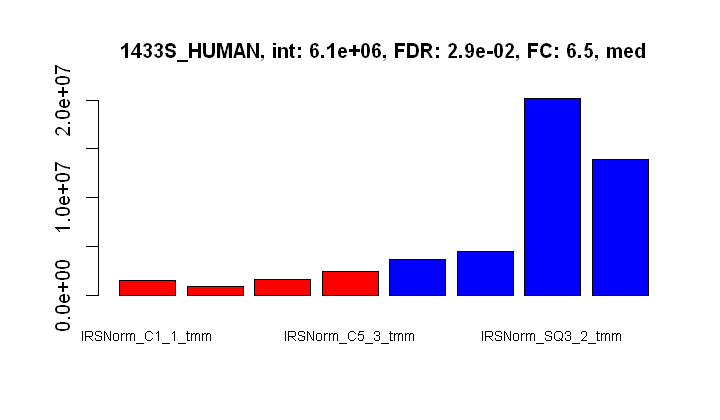

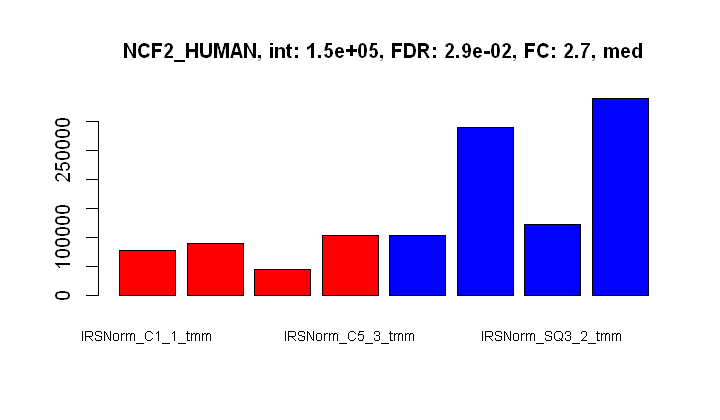

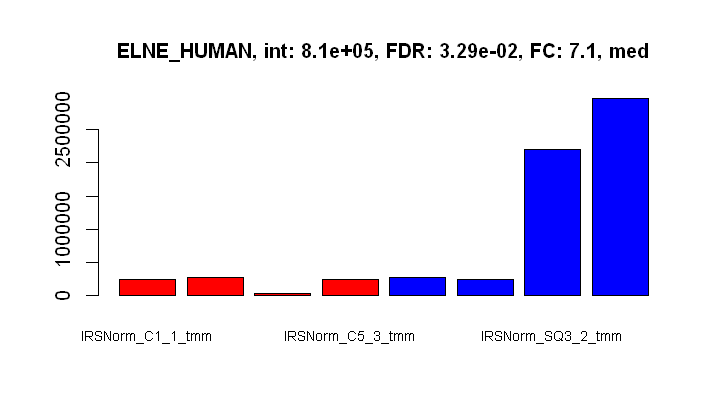

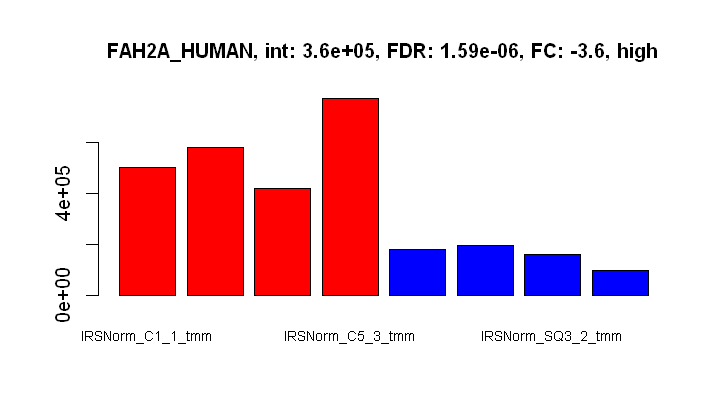

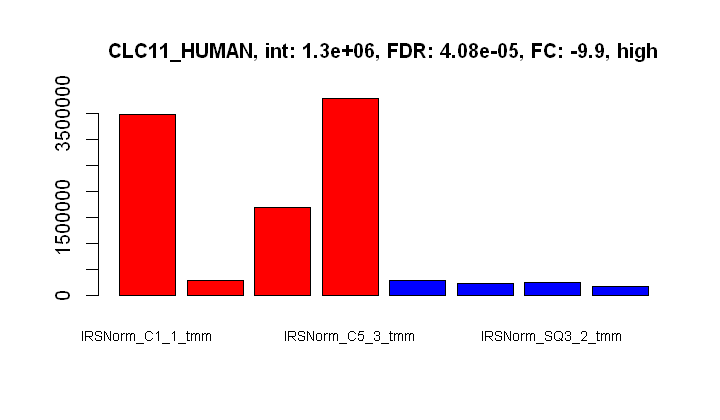

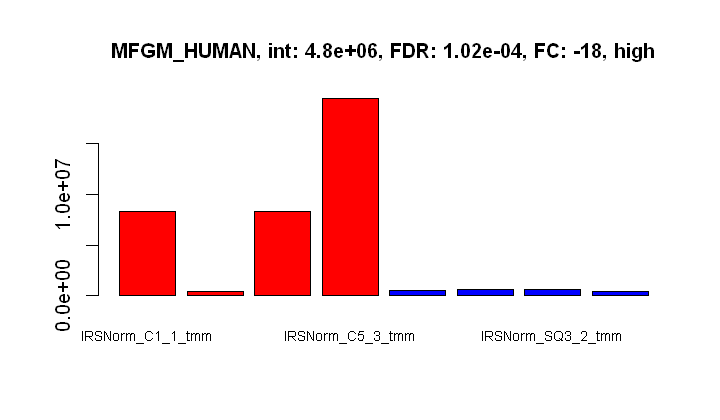

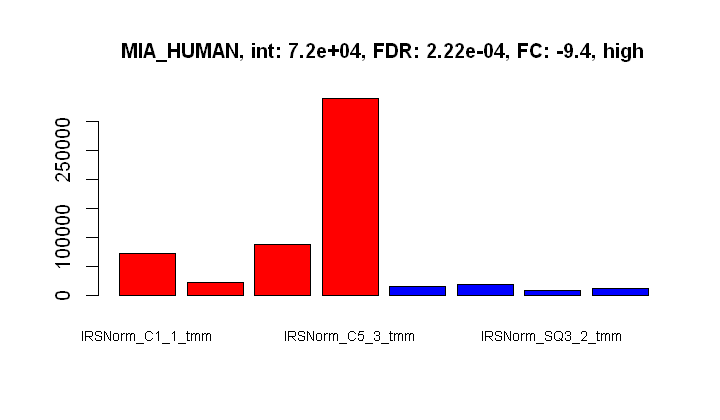

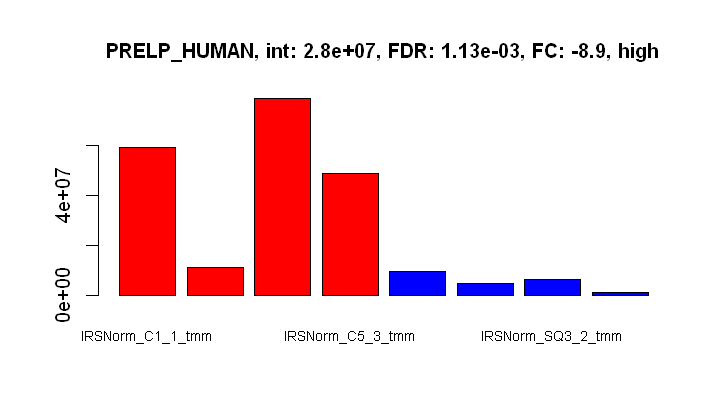

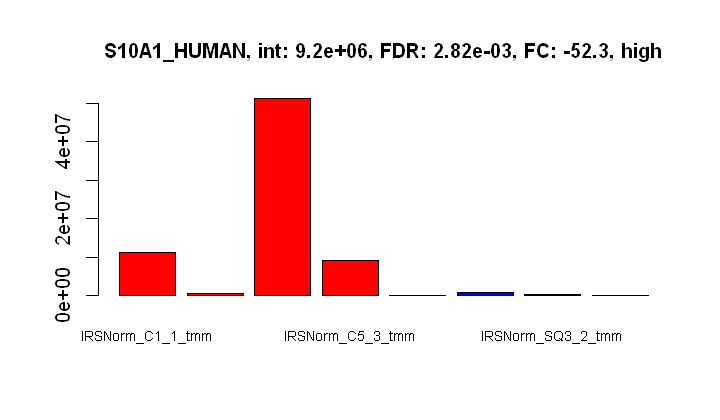

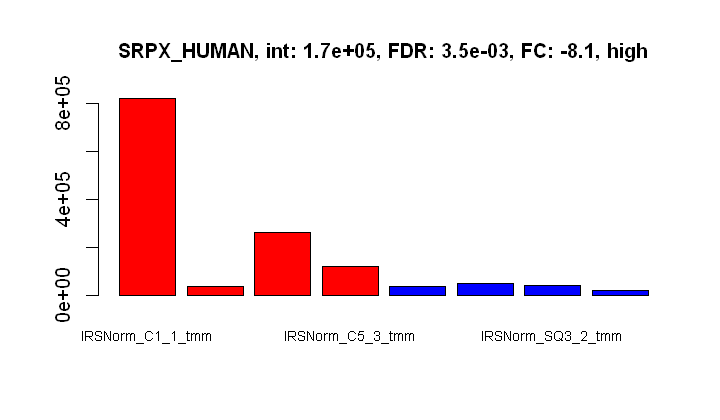

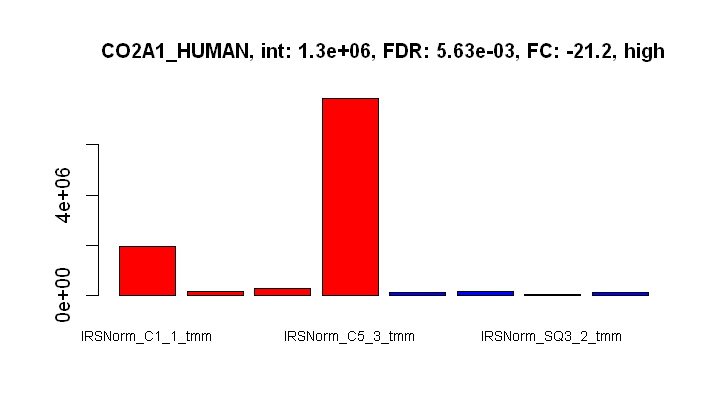

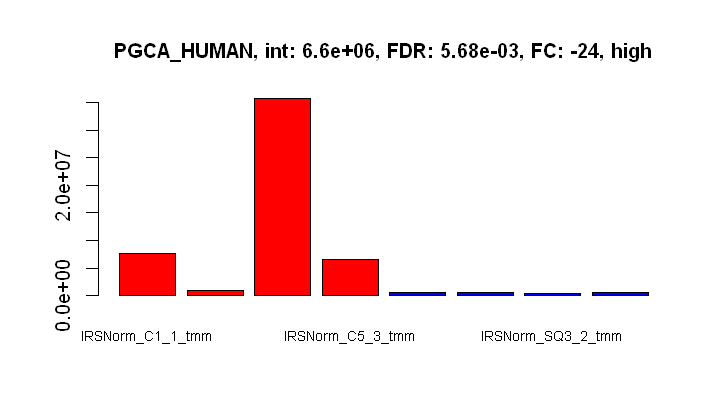

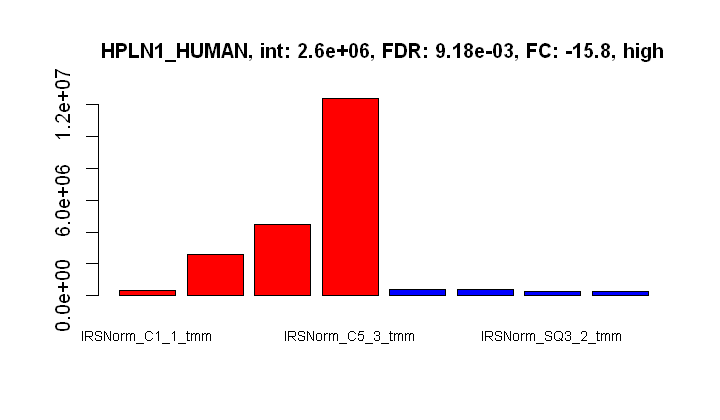

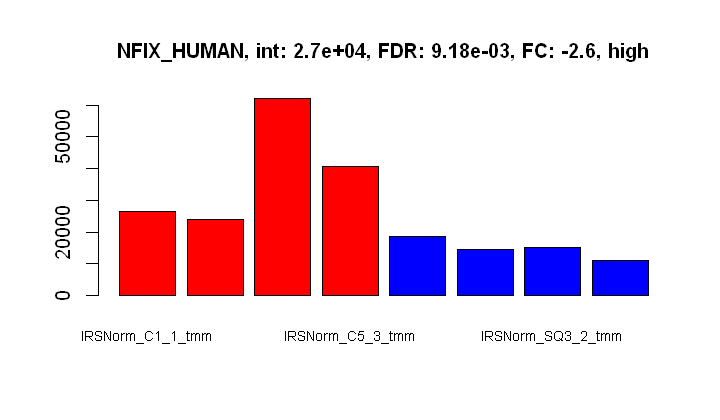

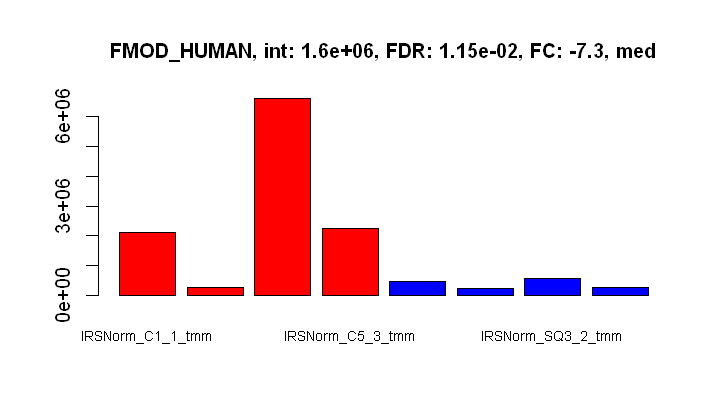

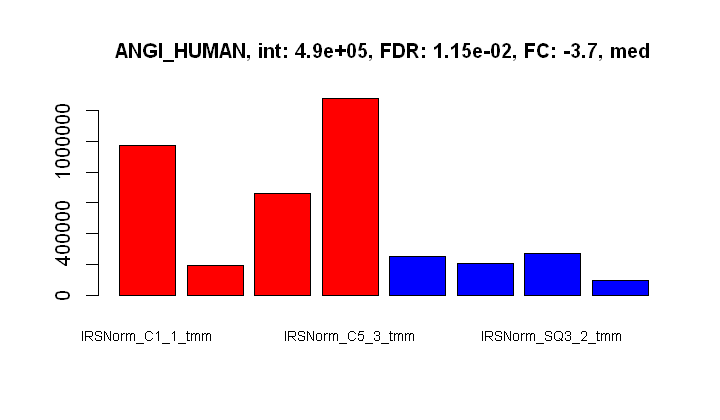

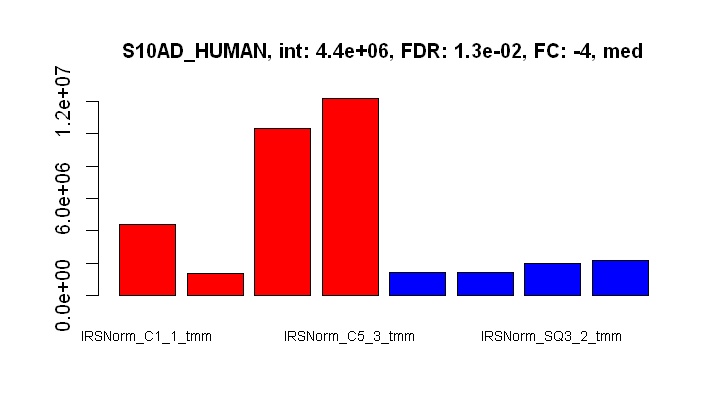

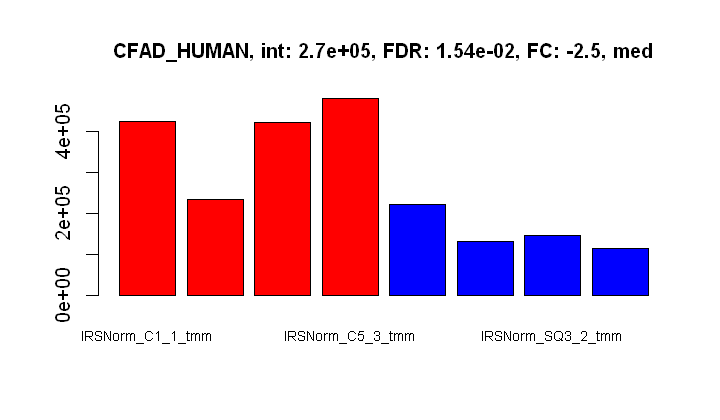

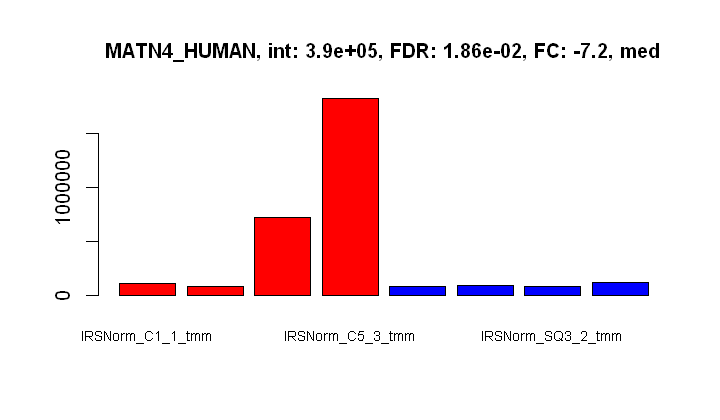

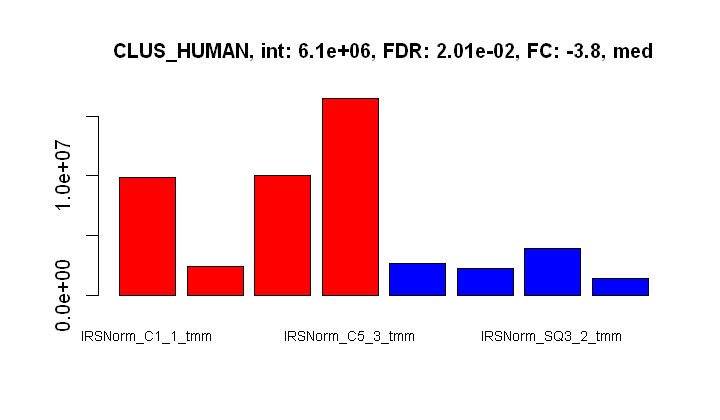

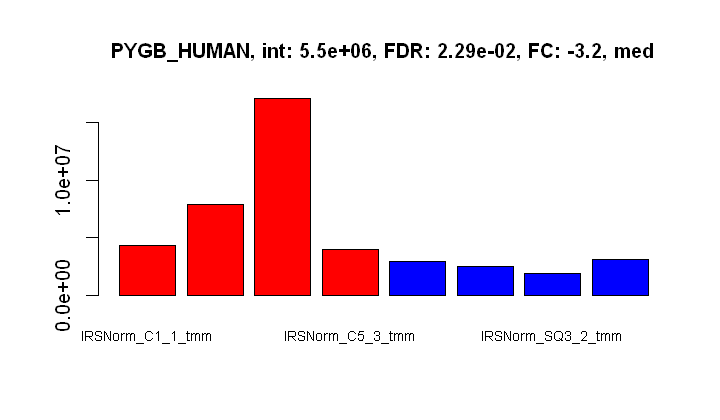

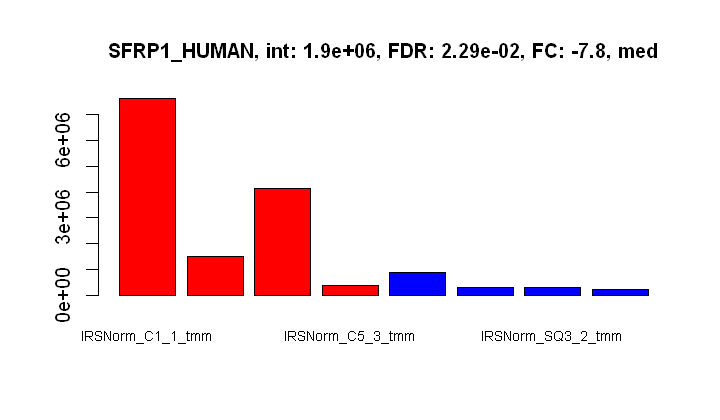

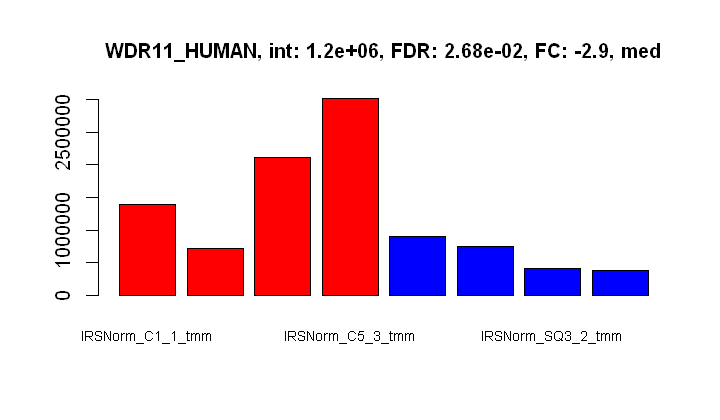

In [24]:
# look at the top 20 candidates (up in Sq, then down in Sq)
set_plot_dimensions(6, 3.5)
plot_top_tags(results, 4, 4, 20)
set_plot_dimensions(7, 7)

### The top DE candidates have a lot of sample-to-sample variation

There are considerable sample to sample variations. However, we do have large differences in expression levels for these candidates. Some look better than others.

----

## <a name="Sp_Sq"></a> (3) Spindle versus Squamous

We can compare the metaplastic spindle sample to the squamous samples. These samples were not very distinct from each other in the cluster plots.

       Sq-Sp
Down       3
NotSig  4088
Up        41

,genes,logFC,logCPM,PValue,FDR
864,sp|P31944|CASPE_HUMAN,4.832809,7.5118595,2.729624e-13,1.127881e-09
1059,sp|P47929|LEG7_HUMAN,3.052724,6.2012220,2.958619e-10,6.112507e-07
3918,sp|A4FU01|MTMRB_HUMAN,3.077060,0.8303571,5.459108e-06,7.519011e-03
716,sp|P35749|MYH11_HUMAN,1.443456,7.3085523,8.002197e-06,7.602480e-03
1980,sp|Q6K0P9|IFIX_HUMAN,4.057790,5.5404095,1.050749e-05,7.602480e-03
1882,sp|P50416|CPT1A_HUMAN,1.001030,5.1577861,1.103942e-05,7.602480e-03
685,sp|P31151|S10A7_HUMAN,4.099242,7.5484122,1.633510e-05,9.642375e-03
1225,sp|P09467|F16P1_HUMAN,2.239754,6.7122924,2.548080e-05,1.316083e-02
909,sp|P20231|TRYB2_HUMAN (+1),1.899261,7.1269653,3.260598e-05,1.496977e-02
1720,sp|P15088|CBPA3_HUMAN,1.569156,5.0401357,5.500753e-05,2.272911e-02


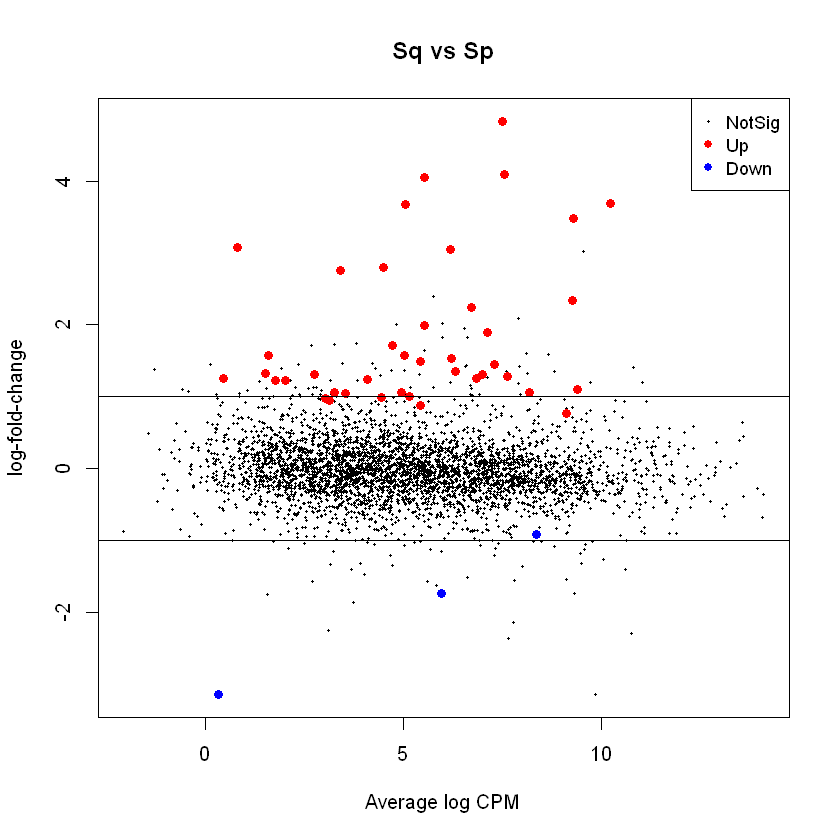

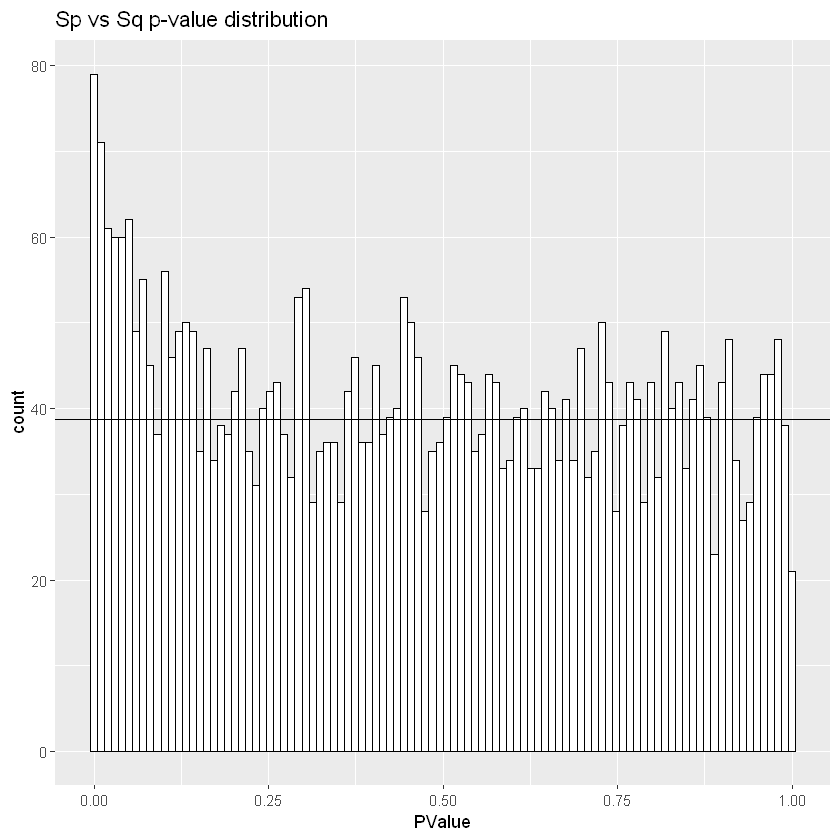

In [25]:
# the exact test object has columns like fold-change, CPM, and p-values
et <- exactTest(y, pair = c("Sp", "Sq"))

# this counts up, down, and unchanged genes (proteins) at 10% FDR
summary(decideTestsDGE(et, p.value = 0.10))

# the topTags function adds the BH FDR values to an exactTest data frame 
# make sure we do not change the row order (the sort.by parameter)!
topTags(et)$table
tt <- topTags(et, n = Inf, sort.by = "none")

# make an MD plot (like MA plot)
plotMD(et, p.value = 0.10)
abline(h = c(-1, 1), col = "black")

# check the p-value distribution
ggplot(tt$table, aes(PValue)) + 
  geom_histogram(bins = 100, fill = "white", color = "black") + 
  geom_hline(yintercept = mean(hist(et$table$PValue, breaks = 100, 
                                    plot = FALSE)$counts[26:100])) +
  ggtitle("Sp vs Sq p-value distribution")

### We have 44 DE candidates 

We have a smaller number of DE candidates here and the candidates are biased towards over expression in spindle versus squamous (41 versus 3). We have a reasonable p-value distribution that is consistent with the reduced number of DE candidates. 

### Compute averages, flag candidates, and save the pair-wise test results

We will add the statistical testing results (logFC, p-values, and FDR), condition intensity averages, and candidate status to the `results` data frame (which has the TMM-normalized data) and also accumulate all of the three comparisons into `all_results`.

Even though we have fewer candidates, we will still make the MA plot, scatter plot, and volcano plot.

In [26]:
# get the results summary
results <- collect_results(tmt_tmm, tt$table, Sp, "Sp", Sq, "Sq")

# make column names unique by adding comparison
results_temp  <- results
colnames(results_temp) <- str_c(colnames(results), "_Sp_Sq")

# accumulate the testing results
all_results <- cbind(all_results, results_temp)

### Count candidates and look at fold-change distributions

candidate,n
high,7
med,12
low,25
no,4088


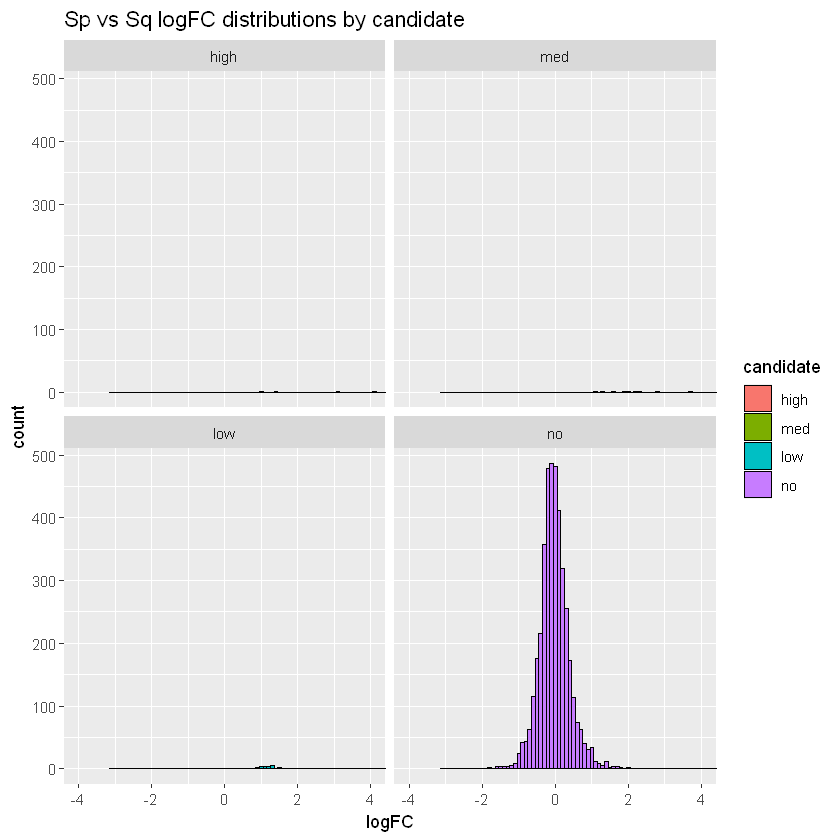

In [27]:
# see how many candidates by category
results %>% count(candidate)

# plot log2 fold-changes by category
ggplot(results, aes(x = logFC, fill = candidate)) +
  geom_histogram(binwidth=0.1, color = "black") +
  facet_wrap(~candidate) +
  coord_cartesian(xlim = c(-4, 4)) +
  ggtitle("Sp vs Sq logFC distributions by candidate")

### MA plots

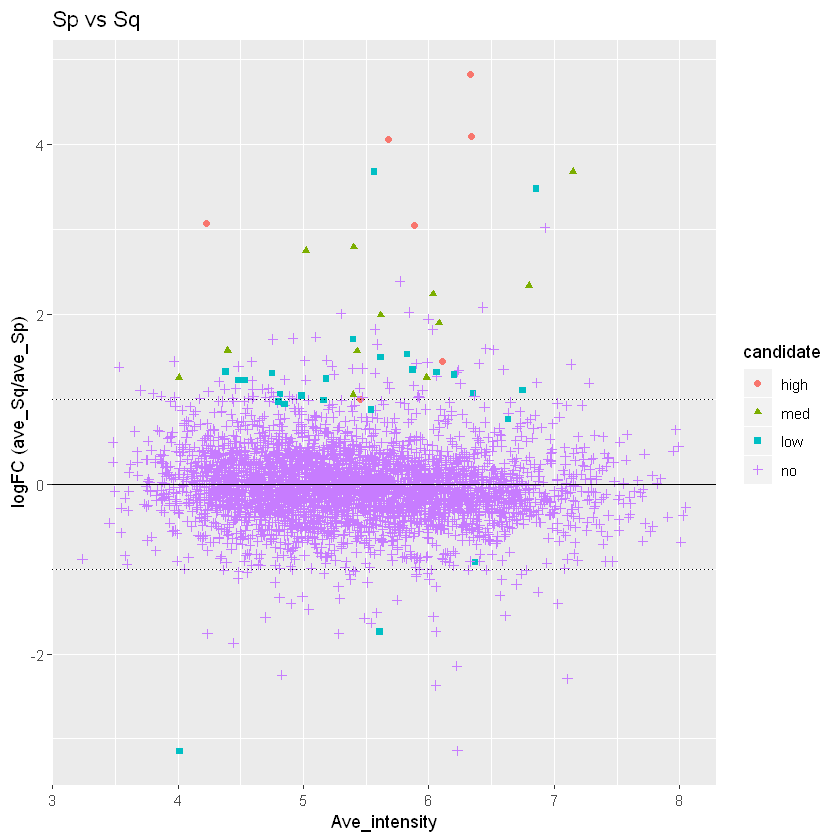

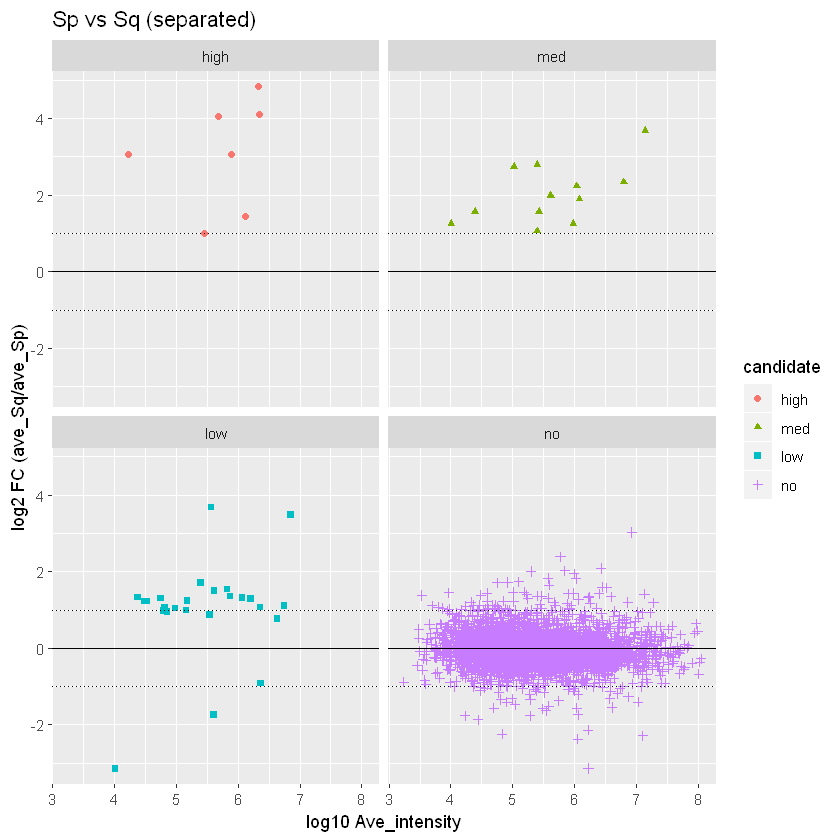

In [28]:
# make MA plots
MA_plots(results, "ave_Sp", "ave_Sq", "Sp vs Sq")

### Scatter plots

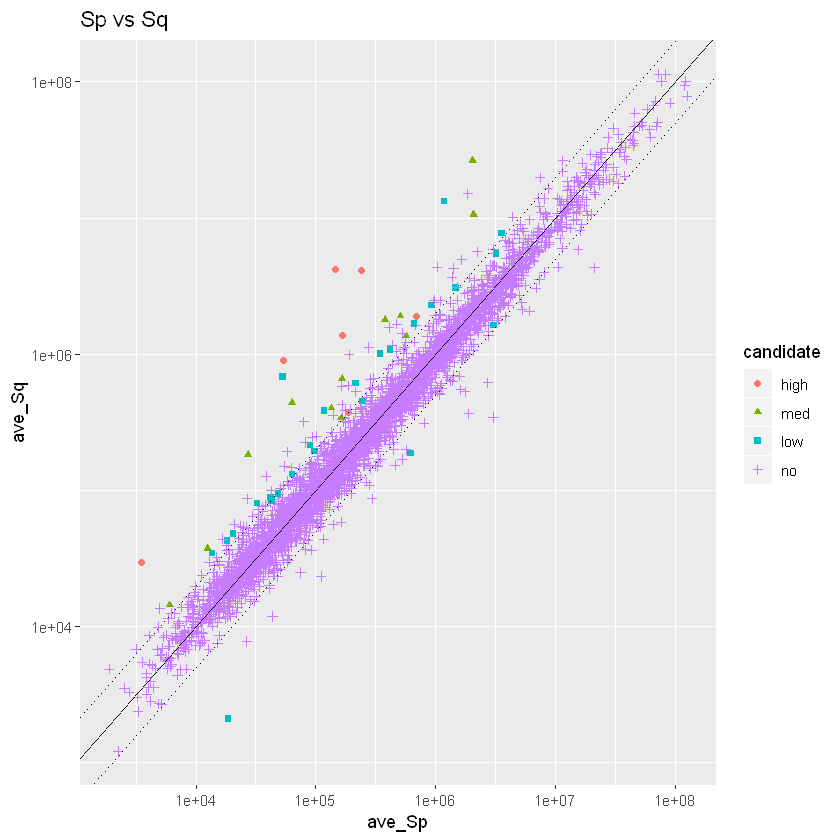

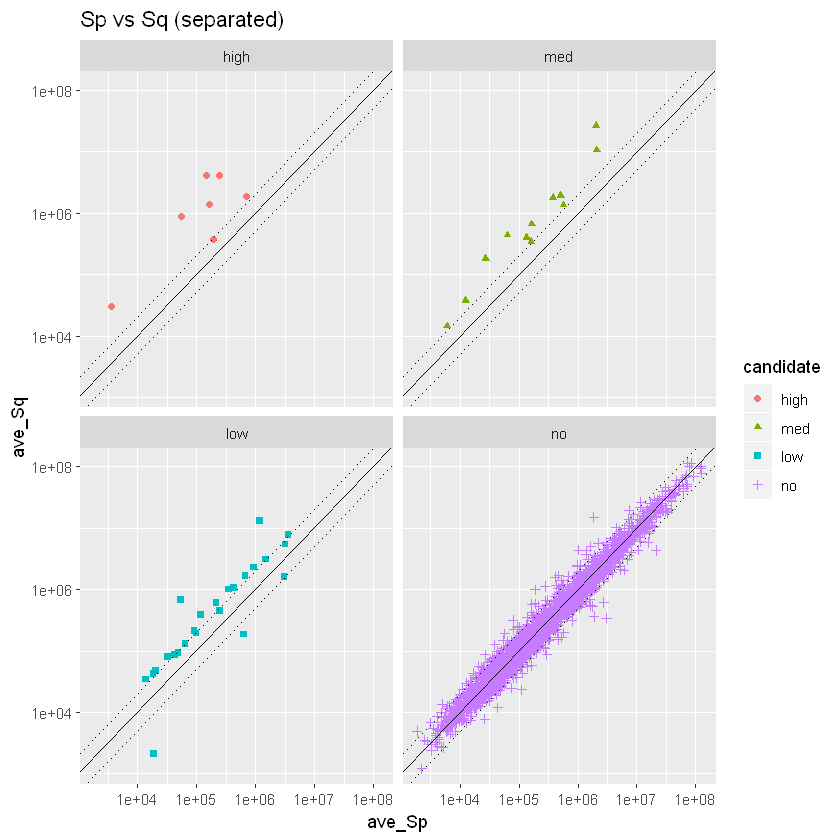

In [29]:
# make scatter plots
scatter_plots(results, "ave_Sp", "ave_Sq", "Sp vs Sq")

### Volcano plot

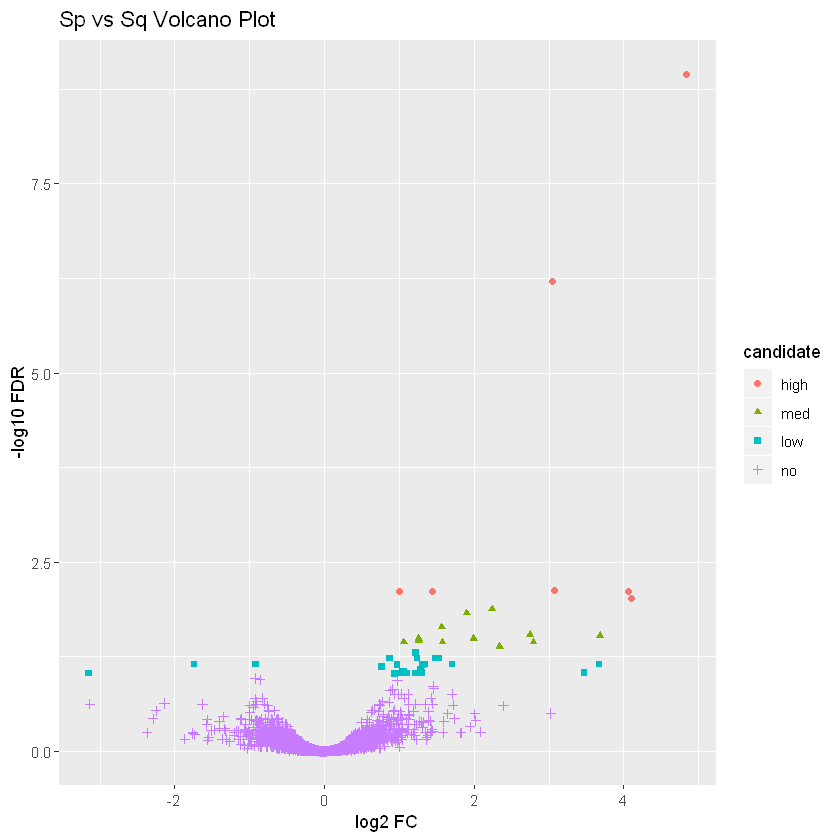

In [30]:
# make a volcano plot
volcano_plot(results, "ave_Sp", "ave_Sq", "Sp vs Sq")

### Reduced number of candidates and few "high" candidates

### Check individual protein expression

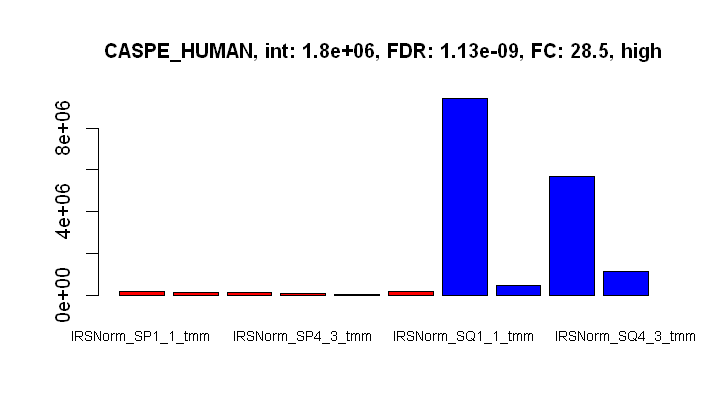

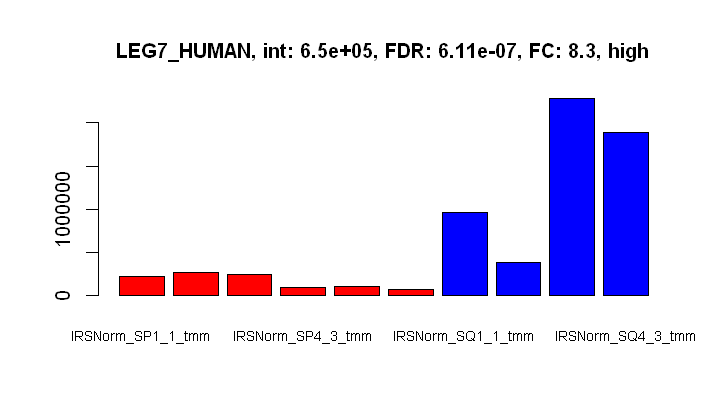

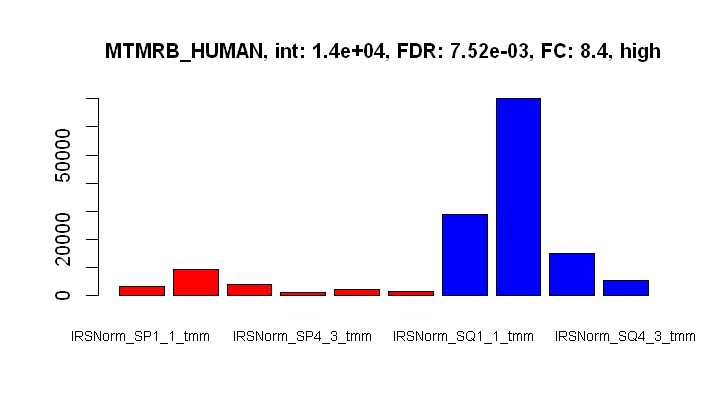

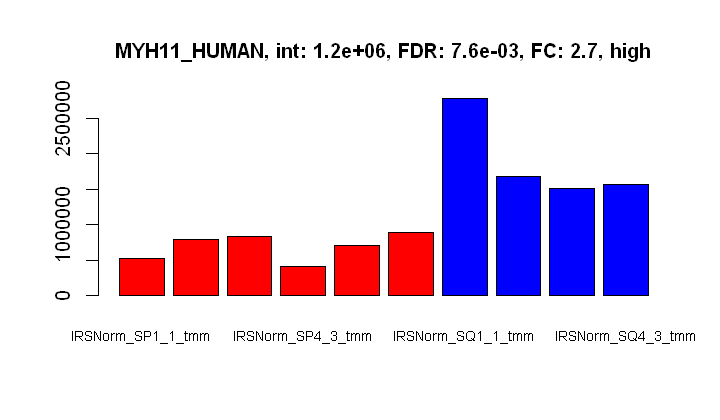

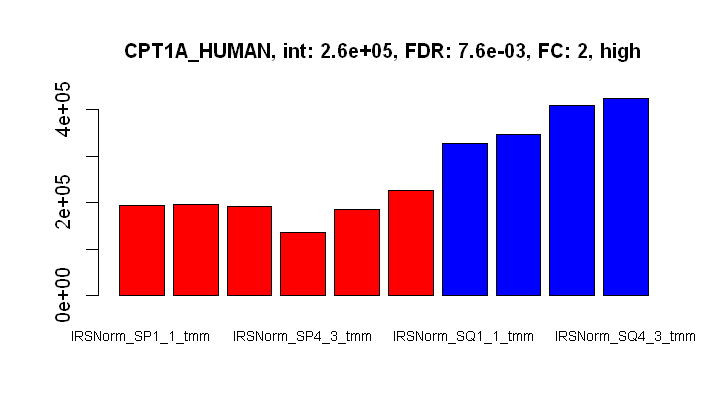

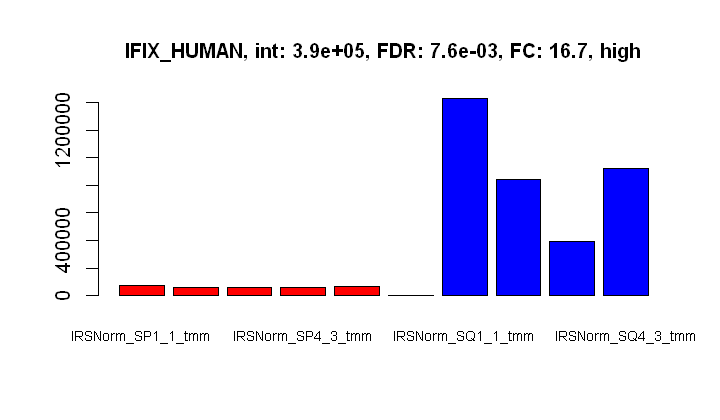

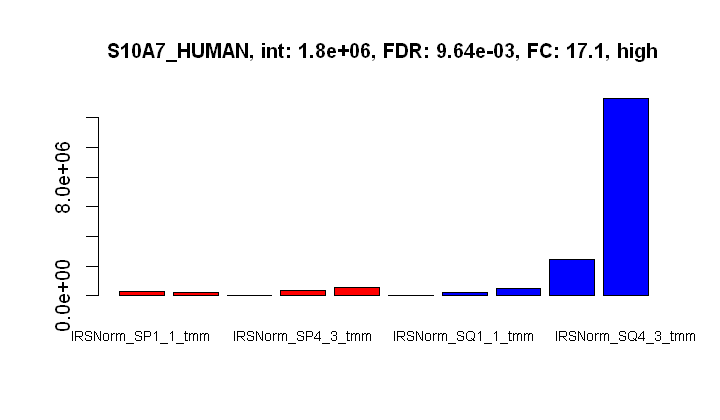

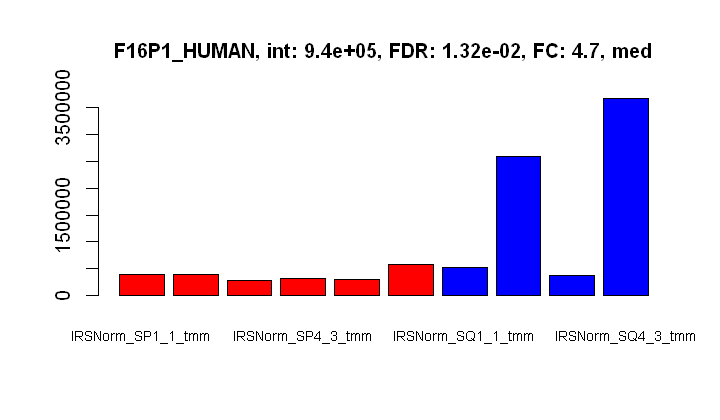

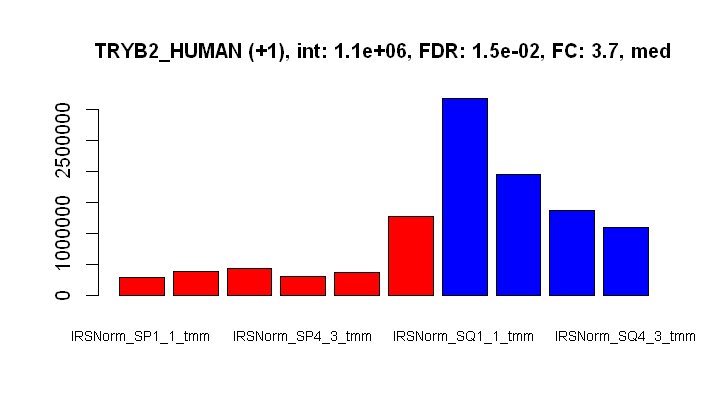

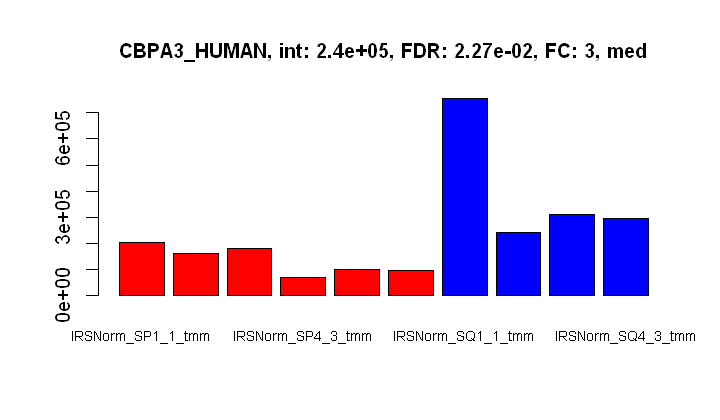

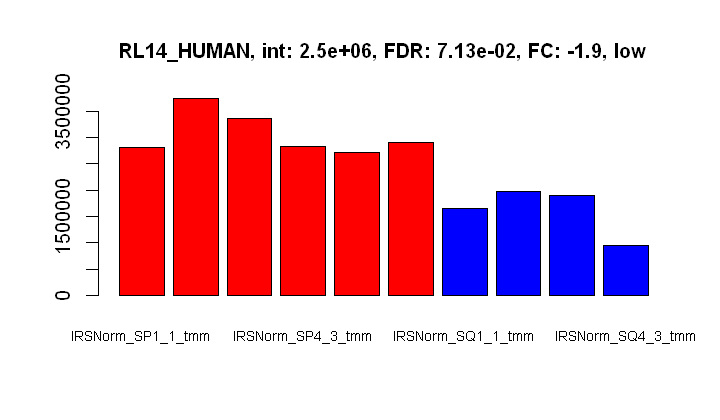

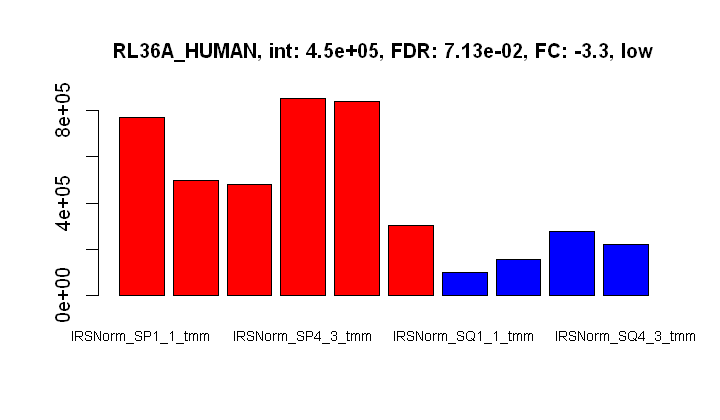

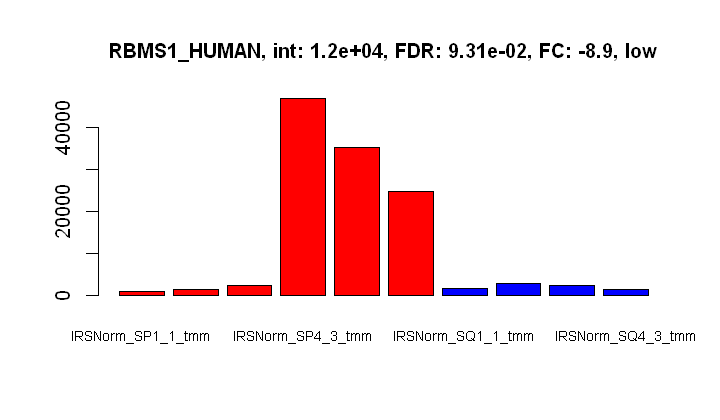

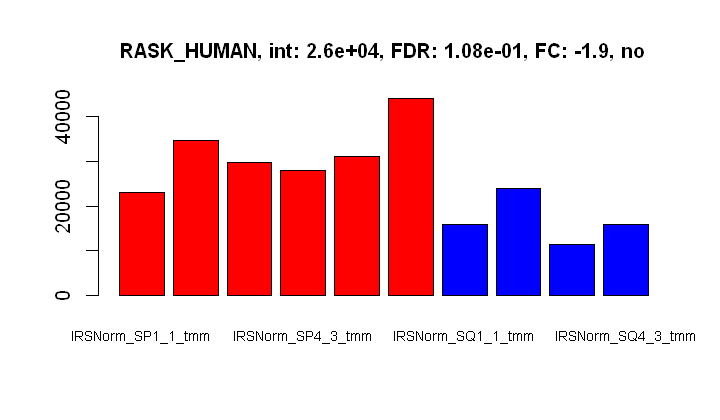

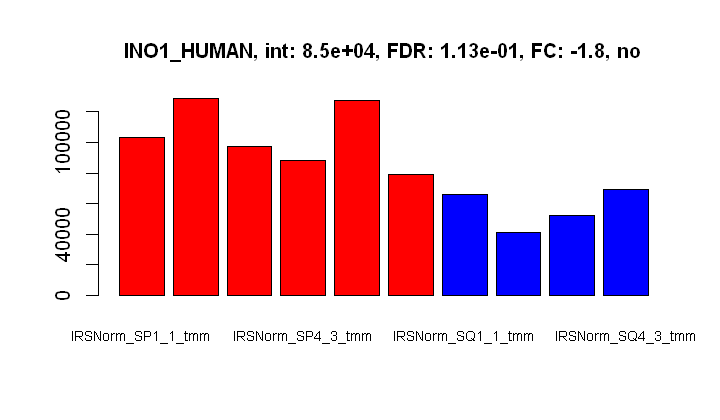

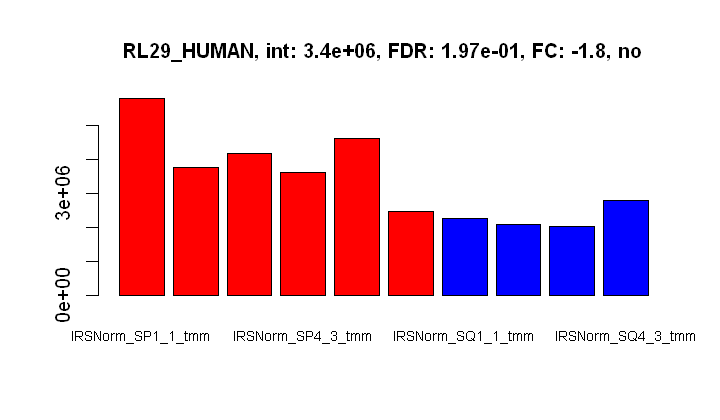

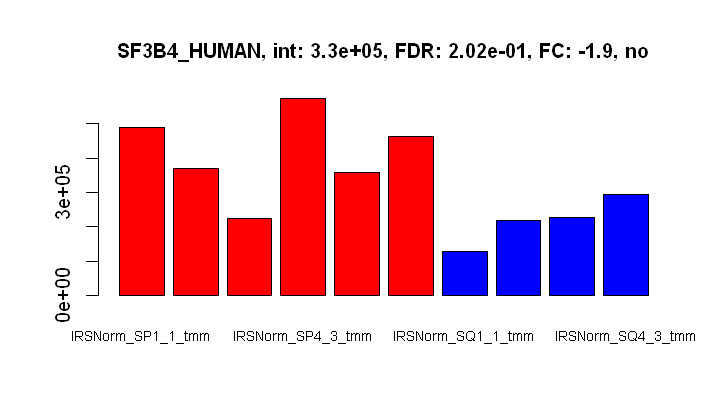

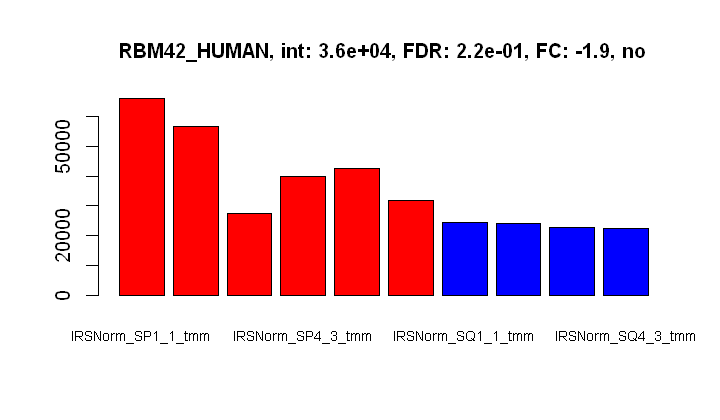

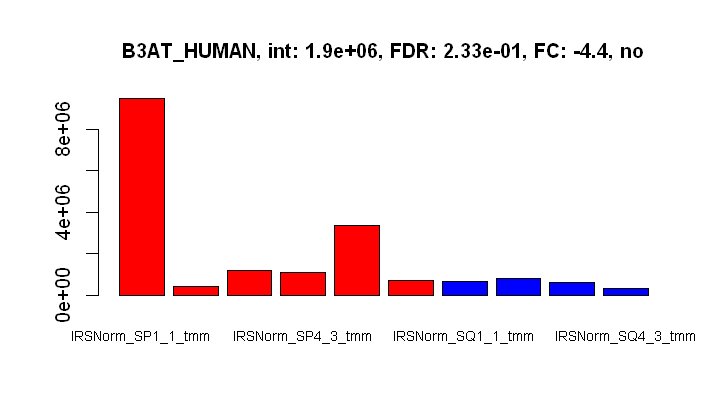

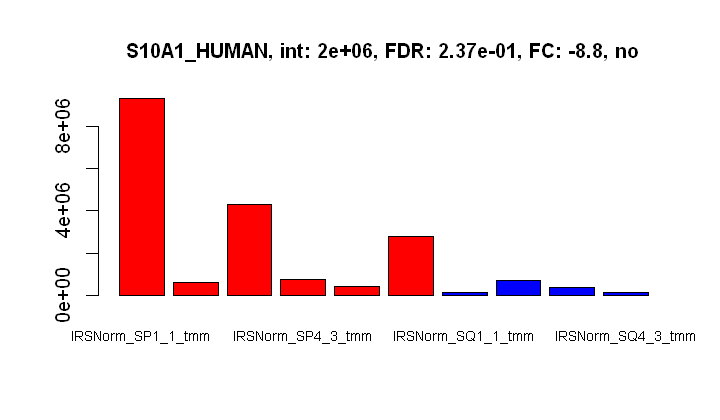

In [31]:
# look at the top 10 candidates (up in Sq, then down in Sq)
set_plot_dimensions(6, 3.5)
plot_top_tags(results, 6, 4, 10)
set_plot_dimensions(7, 7)

### Sample-to-sample variation contributes to reduced candidate numbers

We have some okay DE candidates for spindle versus squamous. However, we have fewer more significant candidates suggesting higher sample-to-sample variances.

---

## <a name="summary"></a> Summary

We had modest numbers of significant differences between the different sub-categories of the metaplastic samples. We also had different candidate expression patterns. The first (C vs Sp) was biased towards down expression in spindle. The second was more balanced with similar numbers of up and down candidates. The last comparison had candidate bias towards up regulation in spindle compared to squamous.

---
## Save the `all_results` frame to TSV file

In [32]:
# write the results to disk
write.table(all_results, "MBC_three_subclasses_results.txt", sep = "\t",
           row.names = FALSE, na =  " ")

## Log the session information

In [33]:
# log the session details
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] psych_1.9.12.31 edgeR_3.28.1    limma_3.42.2    scales_1.1.0   
 [5] forcats_0.4.0   stringr_1.4.0   dplyr_0.8.4     purrr_0.3.3    
 [9] readr_1.3.1     tidyr_1.0.2     tibble_2.1.3    ggplot2_3.2.1  
[13] tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6     locfit_1.5-9.1   lubridate_1.7.4  lattice_0.20-38 
 [5] assertthat_0.2.1 digest_0.6.25    IRdisplay_0.7.0  R6_2.4.1        
 [9] cellranger_1.1.0 repr_0.19.2      backports_1.1.5  reprex_0.3.0    
[13] evaluate_0.14 